# Python Advanced Projektarbeit - Gruppe D  <a class="anchor" id="Anfang"></a>

__________________________________________
<b>Verwendeter Datensatz</b>: https://www.kaggle.com/datasets/nphantawee/pump-sensor-data

<b>Autoren</b>: Samuel Dittmann, Nils Heimbach, Dominik Huber, Ibrahim Kurt, Chrstian Seidler

<b>Datum</b>: 19.06.2022

<b>Hinweis</b>: Auch wenn die Einzelleistung an den verschiedenen Kapiteln vermerkt ist, wurde die gesamte Arbeit zusammen als Gruppe im Rahmen mehrerer <i>"Hackathons"</i> bearbeitet.


__________________________________________
<a class="anchor" id="Inhaltsverzeichnis"></a>
#### Inhaltsverzeichnis:


<ul>
    <li><a href='#0'>0: Voreinstellungen</a></li>
    <li><a href='#1'>1: Data Understanding</a></li>
    <ul>
            <li><a href='#1.1'>1.1: Plots</a></li>
            <li><a href='#1.2'>1.2: Ausreißeranalyse</a></li>
    </ul>
    <li><a href='#2'>2: Data Preparation</a></li>
        <ul>
            <li><a href='#2.1'>2.1: Dummy-Variable für Machine-Status anlegen</a></li>
            <li><a href='#2.2'>2.2: Aufsplitten in Features und Target Variable</a></li>
        </ul>   
    <li><a href='#3'>3: Model Data</a></li>
     <ul>
             <li><a href='#3.1'>3.1: Dimensionsreduktion</a></li>
             <li><a href='#3.2'>3.2: Train-Test-Split</a></li>
             <li><a href='#3.3'>3.3: Anwenden von Algorithmen zur Klassifikation</a></li>
             <li><a href='#3.4'>3.4: Deep Learning</a></li>
             <li><a href='#3.5'>3.5: Clusteranalyse mit K-Means</a></li>
             <li><a href='#3.5'>3.6: Ausreißeranalyse mit DBSCAN</a></li>
             <li><a href='#3.5'>3.7: Anomalieerkennung mit ISOLATIONFOREST</a></li>
        </ul> 
    <li><a href='#4'>4: Fazit </a></li>
    <li><a href='#5'>5: Limitationen</a></li>
</ul>

<a class="anchor" id="0"></a>
<h1>0 Voreinstellungen</h1>

In [1]:
FILEPATH = r'D:\HS Albstadt\Sommersemester 2022\Python Advanced\Task B\Data\Input\sensor.csv'

In [2]:
# Ignoriere alle Warnings
import warnings
warnings.filterwarnings("ignore")

<a href='#0'> Zurück zum Anfang des Kapitels</a>

<a href='#Inhaltsverzeichnis'> Zurück zum Inhaltsverzeichnis</a>

<a class="anchor" id="1"></a>
<h1> 1 Data Understanding</h1>
<br>Bearbeitet von: Ibrahim Kurt, Samuel Dittmann

In [3]:
# Importieren der Pandas Bibliothek
import pandas as pd 

In [4]:
# Importieren des Sensor-Datensatzes als Pandas Dataframe
df = pd.read_csv(FILEPATH)
# Anzeigen der ersten 5 Zeilen des Dataframes
df.head()

Unnamed: 0            timestamp  sensor_00  sensor_01  sensor_02  \
0           0  2018-04-01 00:00:00   2.465394   47.09201    53.2118   
1           1  2018-04-01 00:01:00   2.465394   47.09201    53.2118   
2           2  2018-04-01 00:02:00   2.444734   47.35243    53.2118   
3           3  2018-04-01 00:03:00   2.460474   47.09201    53.1684   
4           4  2018-04-01 00:04:00   2.445718   47.13541    53.2118   

   sensor_03  sensor_04  sensor_05  sensor_06  sensor_07  ...  sensor_43  \
0  46.310760   634.3750   76.45975   13.41146   16.13136  ...   41.92708   
1  46.310760   634.3750   76.45975   13.41146   16.13136  ...   41.92708   
2  46.397570   638.8889   73.54598   13.32465   16.03733  ...   41.66666   
3  46.397568   628.1250   76.98898   13.31742   16.24711  ...   40.88541   
4  46.397568   636.4583   76.58897   13.35359   16.21094  ...   41.40625   

   sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  \
0  39.641200   65.68287   50.92593  38.194440   157.9861   67.70834   
1  39.641200   65.68287   50.92593  38.194440   157.9861   67.70834   
2  39.351852   65.39352   51.21528  38.194443   155.9606   67.12963   
3  39.062500   64.81481   51.21528  38.194440   155.9606   66.84028   
4  38.773150   65.10416   51.79398  38.773150   158.2755   66.55093   

   sensor_50  sensor_51  machine_status  
0   243.0556   201.3889          NORMAL  
1   243.0556   201.3889          NORMAL  
2   241.3194   203.7037          NORMAL  
3   240.4514   203.1250          NORMAL  
4   242.1875   201.3889          NORMAL  

[5 rows x 55 columns]

In [5]:
# Ausgabe der Anzahl an Spalten und Zeilen im Dataframe
df.shape

(220320, 55)

In [6]:
# Beschreibung der Spalteneigenschaften der Spalten im DataFrame.
df.describe()

Unnamed: 0      sensor_00      sensor_01      sensor_02  \
count  220320.000000  210112.000000  219951.000000  220301.000000   
mean   110159.500000       2.372221      47.591611      50.867392   
std     63601.049991       0.412227       3.296666       3.666820   
min         0.000000       0.000000       0.000000      33.159720   
25%     55079.750000       2.438831      46.310760      50.390620   
50%    110159.500000       2.456539      48.133678      51.649300   
75%    165239.250000       2.499826      49.479160      52.777770   
max    220319.000000       2.549016      56.727430      56.032990   

           sensor_03      sensor_04      sensor_05      sensor_06  \
count  220301.000000  220301.000000  220301.000000  215522.000000   
mean       43.752481     590.673936      73.396414      13.501537   
std         2.418887     144.023912      17.298247       2.163736   
min        31.640620       2.798032       0.000000       0.014468   
25%        42.838539     626.620400      69.976260      13.346350   
50%        44.227428     632.638916      75.576790      13.642940   
75%        45.312500     637.615723      80.912150      14.539930   
max        48.220490     800.000000      99.999880      22.251160   

           sensor_07      sensor_08  ...      sensor_42      sensor_43  \
count  214869.000000  215213.000000  ...  220293.000000  220293.000000   
mean       15.843152      15.200721  ...      35.453455      43.879591   
std         2.201155       2.037390  ...      10.259521      11.044404   
min         0.000000       0.028935  ...      22.135416      24.479166   
25%        15.907120      15.183740  ...      32.812500      39.583330   
50%        16.167530      15.494790  ...      35.156250      42.968750   
75%        16.427950      15.697340  ...      36.979164      46.614580   
max        23.596640      24.348960  ...     374.218800     408.593700   

           sensor_44      sensor_45      sensor_46      sensor_47  \
count  220293.000000  220293.000000  220293.000000  220293.000000   
mean       42.656877      43.094984      48.018585      44.340903   
std        11.576355      12.837520      15.641284      10.442437   
min        25.752316      26.331018      26.331018      27.199070   
25%        36.747684      36.747684      40.509258      39.062500   
50%        40.509260      40.219910      44.849540      42.534720   
75%        45.138890      44.849540      51.215280      46.585650   
max      1000.000000     320.312500     370.370400     303.530100   

           sensor_48      sensor_49      sensor_50      sensor_51  
count  220293.000000  220293.000000  143303.000000  204937.000000  
mean      150.889044      57.119968     183.049260     202.699667  
std        82.244957      19.143598      65.258650     109.588607  
min        26.331018      26.620370      27.488426      27.777779  
25%        83.912030      47.743060     167.534700     179.108800  
50%       138.020800      52.662040     193.865700     197.338000  
75%       208.333300      60.763890     219.907400     216.724500  
max       561.632000     464.409700    1000.000000    1000.000000  

[8 rows x 53 columns]

In [7]:
# Ausgabe von Informationen über den DataFrame.
# Die Informationen enthalten die Anzahl der Spalten,
# Spaltenbeschriftungen, Spaltendatentypen und den Bereichsindex 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

<b>Auffälligkeiten</b>:
<br>Sensor 15 enthält nur na-Werte, Unnamed-Spalte?, timestamp nicht als Datumsformat hinterlegt,
machine_status als String, Sensor 50 enthält viele na-Werte

In [8]:
# Importieren der numpy Bibliothek
import numpy as np

In [9]:
# Definieren einer Funktion die verschiedene Insights unseres Data Frames berechnet und zurückgibt.
def calculate_advanced_info_per_column(df):
    """Darstellung von Insights wie NaN-Values, unique values und Datentypen je Spalte."""
    output  = []
    for col in df.columns:
        # Anzahl an nicht NaN-Werten bestimmen
        nonNull  = len(df) - np.sum(pd.isna(df[col]))
        # Anzahl und prozentualer Anteil an NaN-Werten bestimmen
        NullValues = np.sum(pd.isna(df[col]))
        percentNA = NullValues/(NullValues+nonNull)
        # Anzahl an eindeutigen Werten bestimmen
        unique = df[col].nunique()
        # Datentyp der Spalte bestimmen
        colType = str(df[col].dtype)
        
        output.append([col, nonNull, NullValues,percentNA, unique, colType])

    output = pd.DataFrame(output)   
    output.columns = ['colName','non-null values','null values',"percentNA", 'unique', 'dtype']

    return output

In [10]:
# Anzeige des Dataframes auf den unsere vorher definierte Funktion angewandt wird
calculate_advanced_info_per_column(df)

colName  non-null values  null values  percentNA  unique    dtype
0       Unnamed: 0           220320            0   0.000000  220320    int64
1        timestamp           220320            0   0.000000  220320   object
2        sensor_00           210112        10208   0.046333    1253  float64
3        sensor_01           219951          369   0.001675     831  float64
4        sensor_02           220301           19   0.000086     831  float64
5        sensor_03           220301           19   0.000086     588  float64
6        sensor_04           220301           19   0.000086    7844  float64
7        sensor_05           220301           19   0.000086  190751  float64
8        sensor_06           215522         4798   0.021777     812  float64
9        sensor_07           214869         5451   0.024741     531  float64
10       sensor_08           215213         5107   0.023180     626  float64
11       sensor_09           215725         4595   0.020856     565  float64
12       sensor_10           220301           19   0.000086  198804  float64
13       sensor_11           220301           19   0.000086  196368  float64
14       sensor_12           220301           19   0.000086  187145  float64
15       sensor_13           220301           19   0.000086  191983  float64
16       sensor_14           220299           21   0.000095   94564  float64
17       sensor_15                0       220320   1.000000       0  float64
18       sensor_16           220289           31   0.000141  110522  float64
19       sensor_17           220274           46   0.000209  148000  float64
20       sensor_18           220274           46   0.000209  152603  float64
21       sensor_19           220304           16   0.000073  100422  float64
22       sensor_20           220304           16   0.000073   92129  float64
23       sensor_21           220304           16   0.000073  131083  float64
24       sensor_22           220279           41   0.000186  126401  float64
25       sensor_23           220304           16   0.000073  119286  float64
26       sensor_24           220304           16   0.000073  133778  float64
27       sensor_25           220284           36   0.000163  165999  float64
28       sensor_26           220300           20   0.000091  179718  float64
29       sensor_27           220304           16   0.000073  203198  float64
30       sensor_28           220304           16   0.000073  189278  float64
31       sensor_29           220248           72   0.000327  201908  float64
32       sensor_30           220059          261   0.001185    2070  float64
33       sensor_31           220304           16   0.000073    2685  float64
34       sensor_32           220252           68   0.000309  205414  float64
35       sensor_33           220304           16   0.000073  200855  float64
36       sensor_34           220304           16   0.000073  203895  float64
37       sensor_35           220304           16   0.000073  201781  float64
38       sensor_36           220304           16   0.000073  201437  float64
39       sensor_37           220304           16   0.000073  188898  float64
40       sensor_38           220293           27   0.000123     602  float64
41       sensor_39           220293           27   0.000123     909  float64
42       sensor_40           220293           27   0.000123     878  float64
43       sensor_41           220293           27   0.000123     594  float64
44       sensor_42           220293           27   0.000123     699  float64
45       sensor_43           220293           27   0.000123     713  float64
46       sensor_44           220293           27   0.000123     628  float64
47       sensor_45           220293           27   0.000123     675  float64
48       sensor_46           220293           27   0.000123     845  float64
49       sensor_47           220293           27   0.000123     621  float64
50       sensor_48           220293           27   0.000123    1440  float64
51     

<a class="anchor" id="1.1"></a>
<h3>1.1 Plots</h3>

In [11]:
# Erstellung eines neuen Dataframes durch Kopie vom bestehenden df
df_plots = df.copy()

In [12]:
# Entfernen der Spalte "unnamed: 0"
df_plots.drop(columns=['Unnamed: 0'], inplace=True)

In [13]:
# Anpassung des Datumsformats in der Spalte "timestamp"
df_plots['timestamp'] = pd.to_datetime(df_plots['timestamp'], format='%Y-%m-%d %H:%M:%S')

In [15]:
# Umwandeln der Spalte "machine_status" vom Datentyp 'object' in eine Kategorie mittels einer Mappingtabelle.
# Durch das Mapping werden die Strings in Zahlenwerte umgewandelt.
mapping = {'NORMAL': 0, 'BROKEN': 1, 'RECOVERING': 2}
df_plots['machine_status'] = df_plots['machine_status'].map(mapping).astype("category")

In [16]:
# Import der matplot.pyplot Bibliothek
import matplotlib.pyplot as plt

# Import der Datenvisualisierungsbibliothek Seaborn, die auf Matplotlib aufbaut.
import seaborn as sns

In [17]:
# Customizing von Seaborn Darstellungsoptionen
sns.set_style("darkgrid")
sns.color_palette()
sns.set_context('notebook')

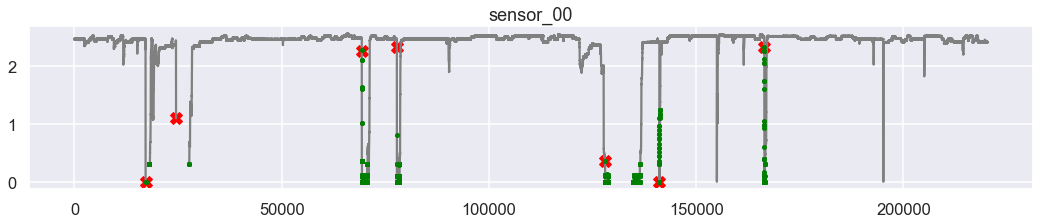

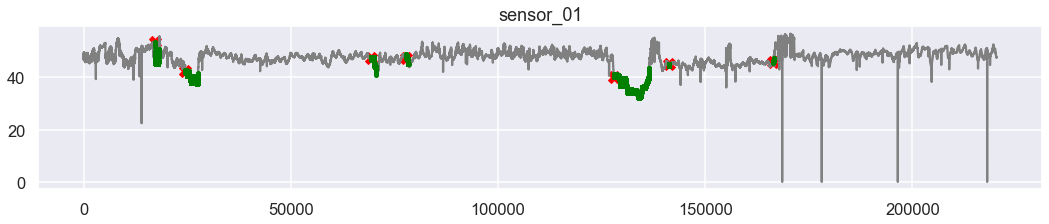

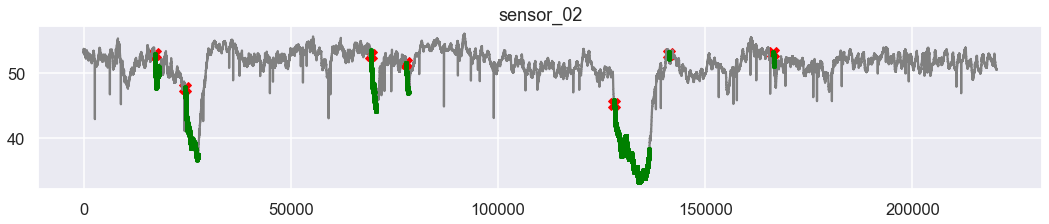

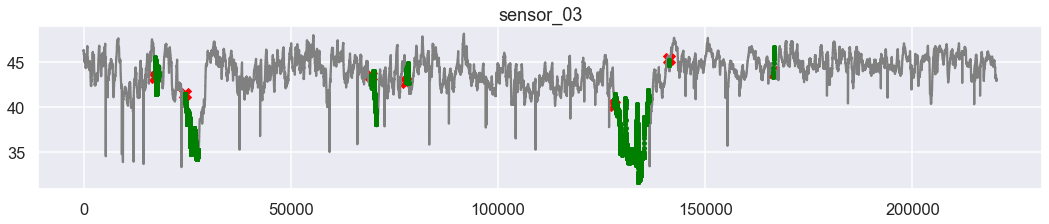

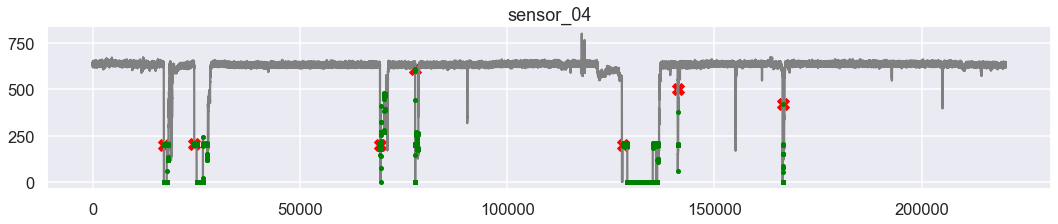

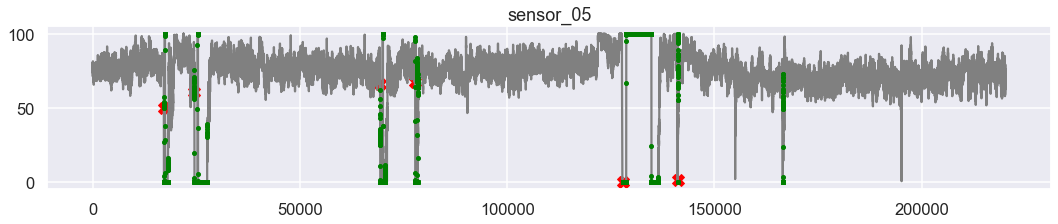

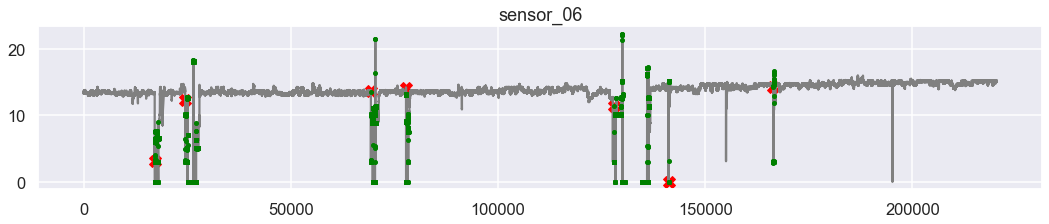

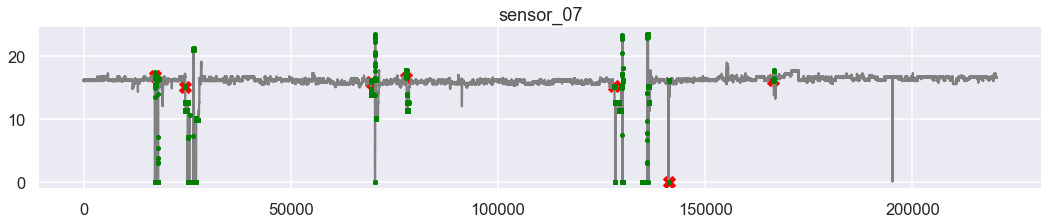

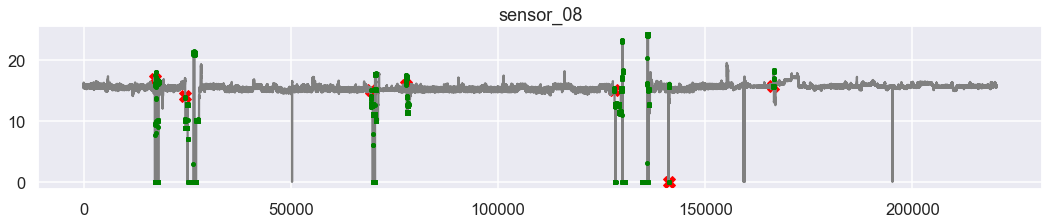

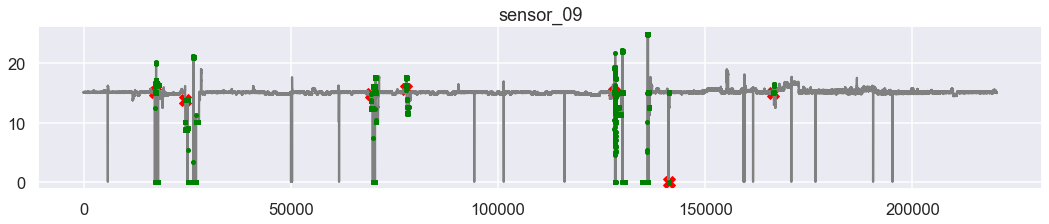

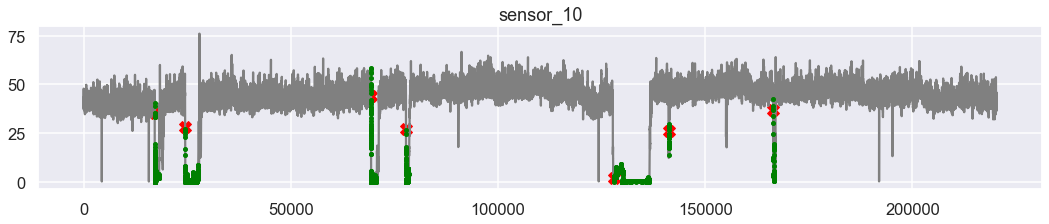

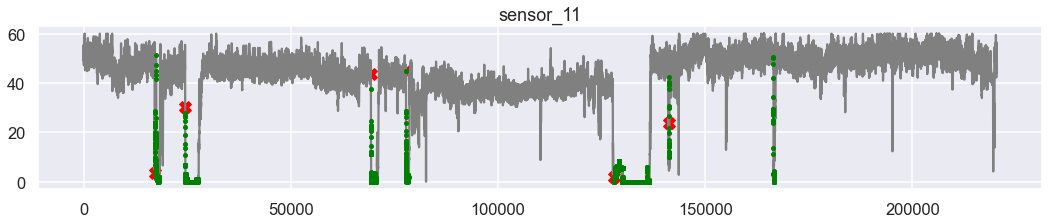

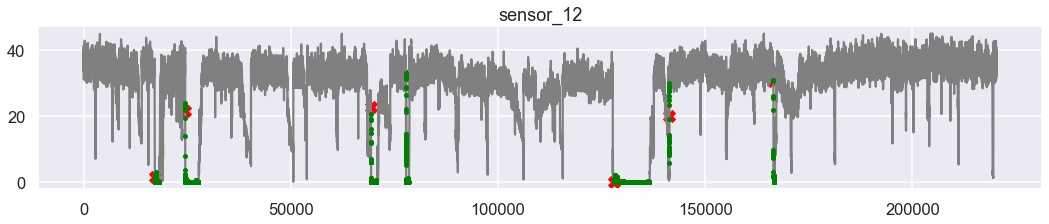

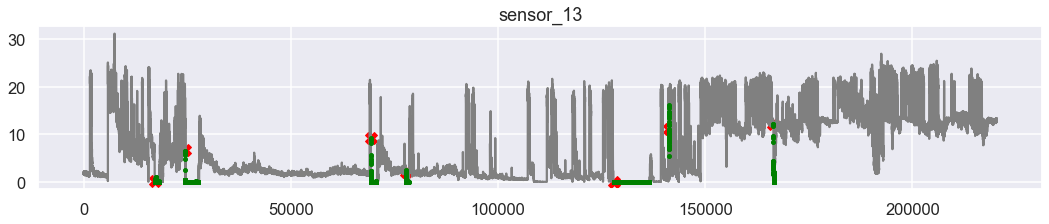

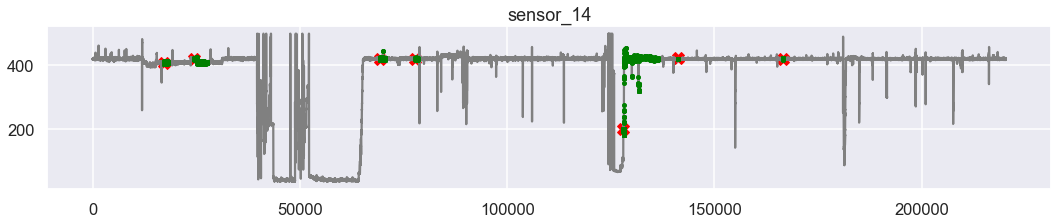

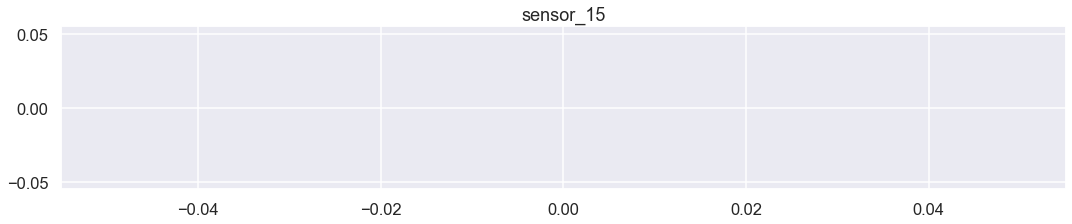

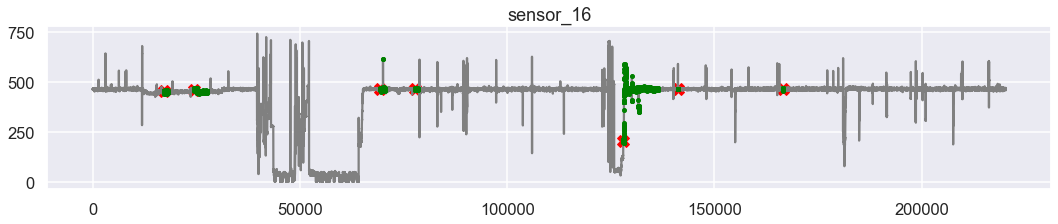

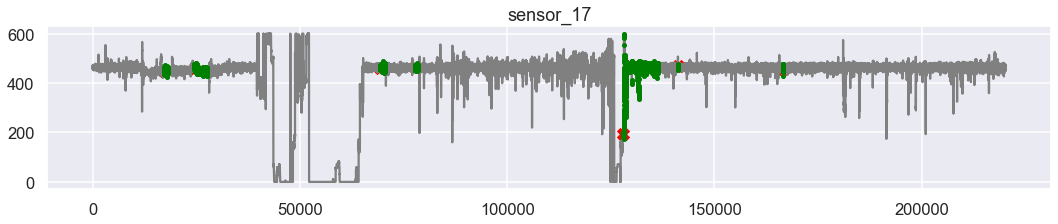

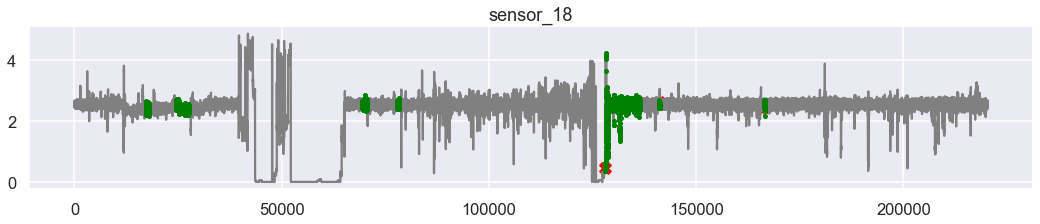

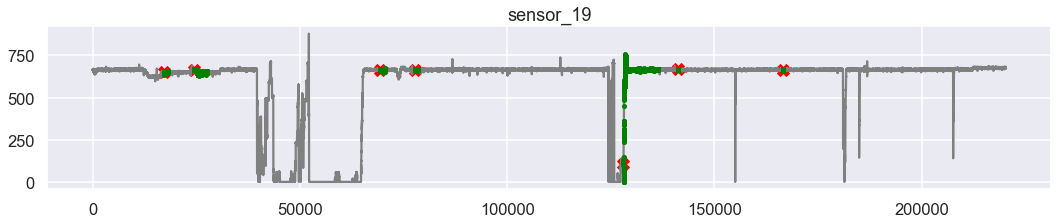

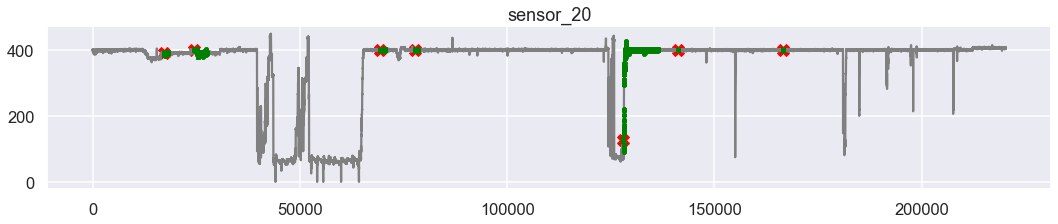

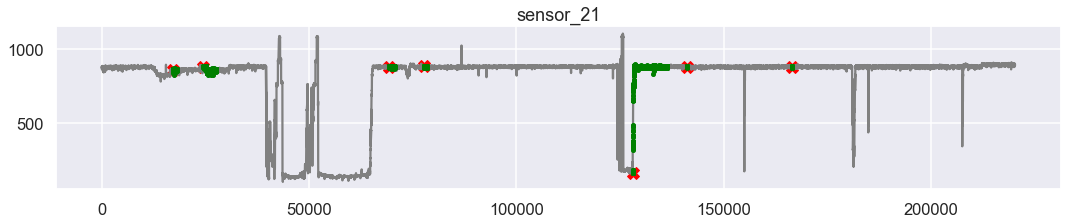

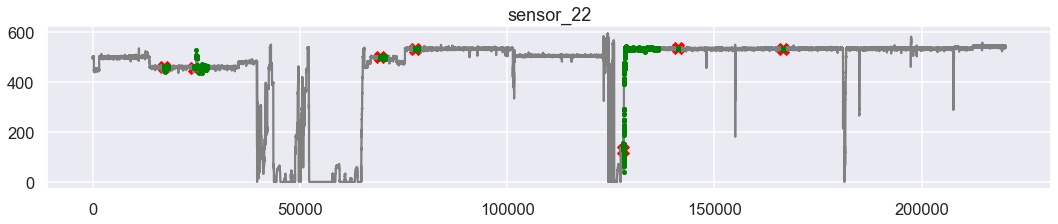

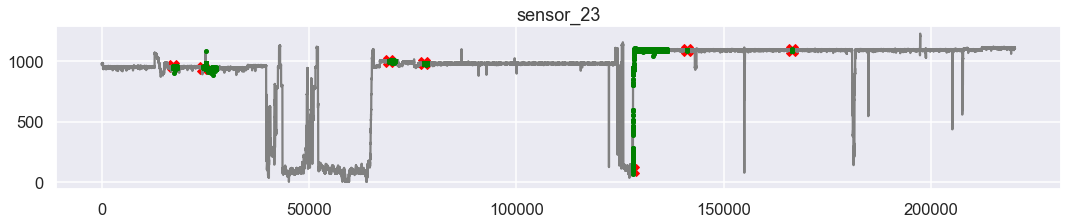

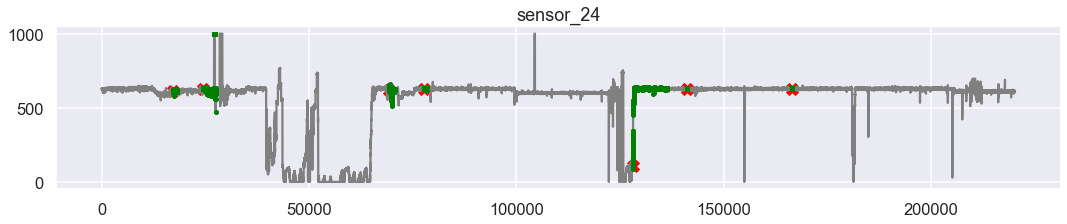

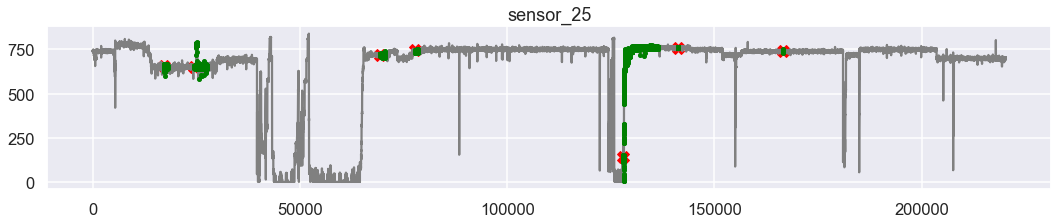

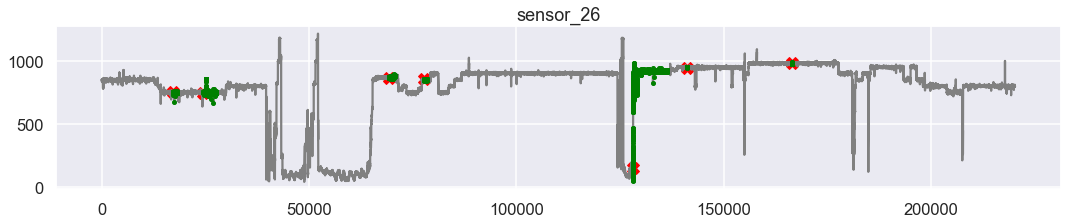

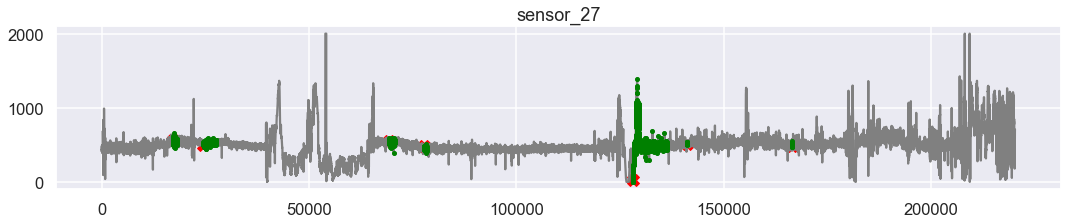

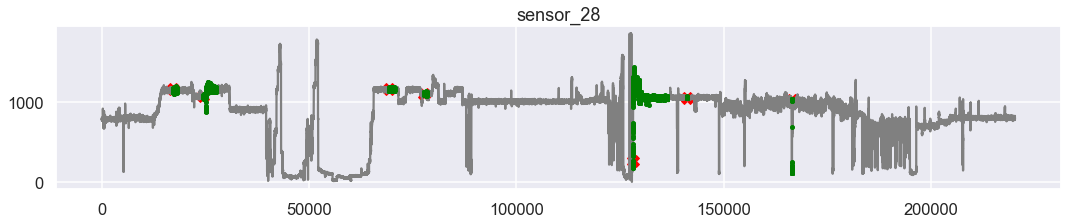

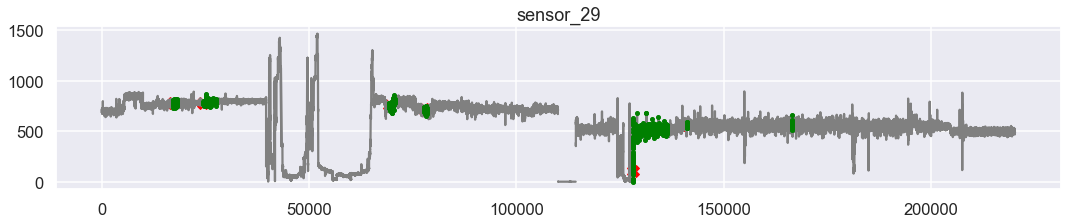

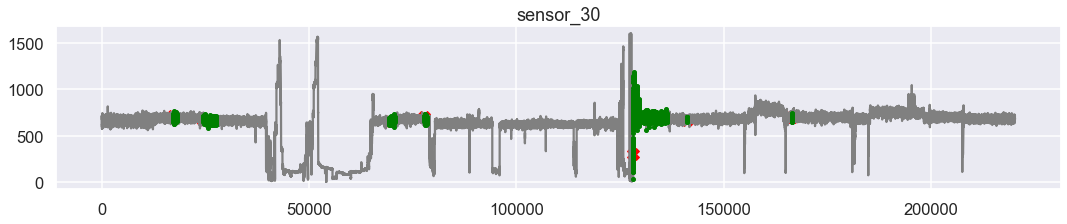

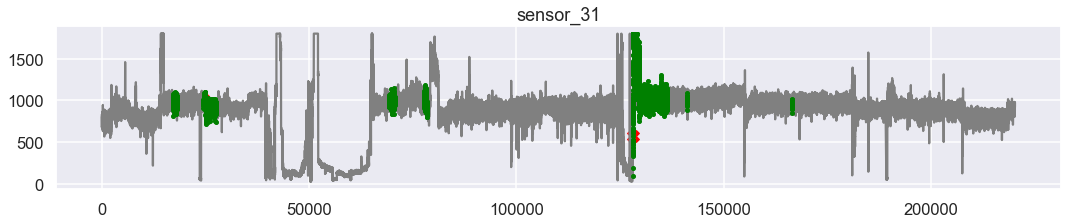

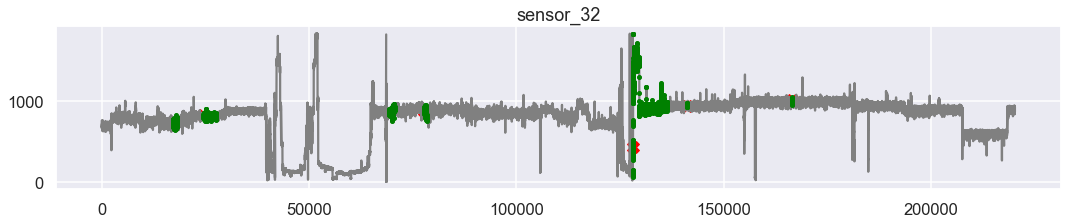

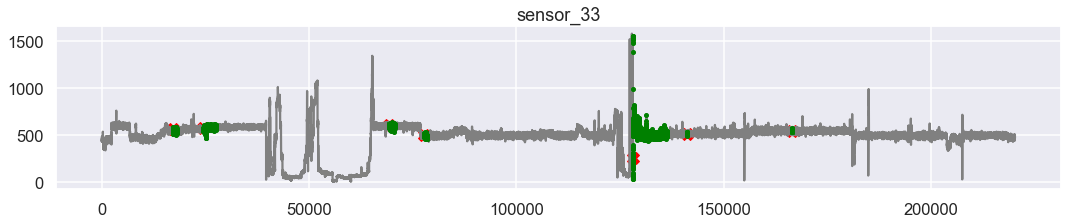

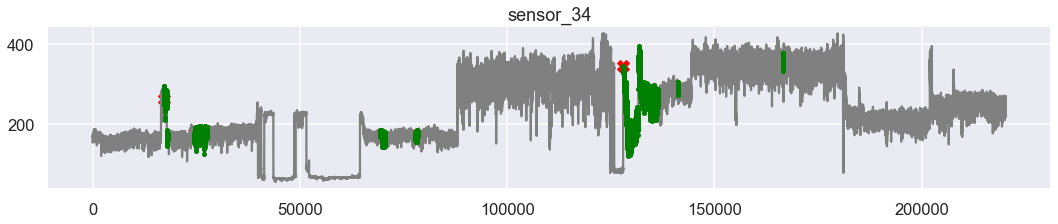

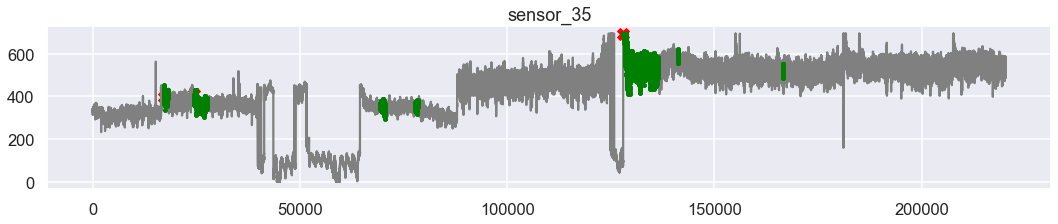

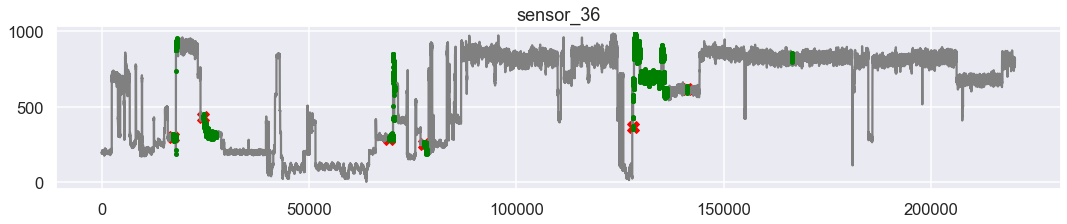

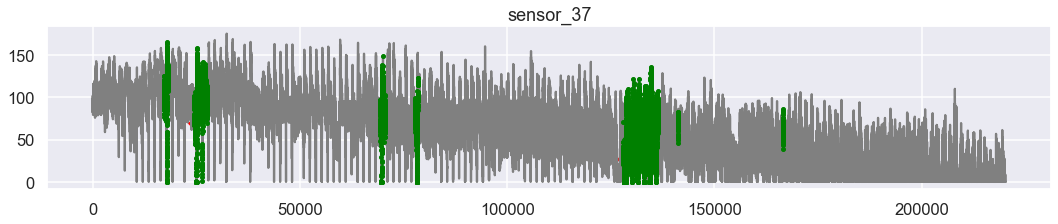

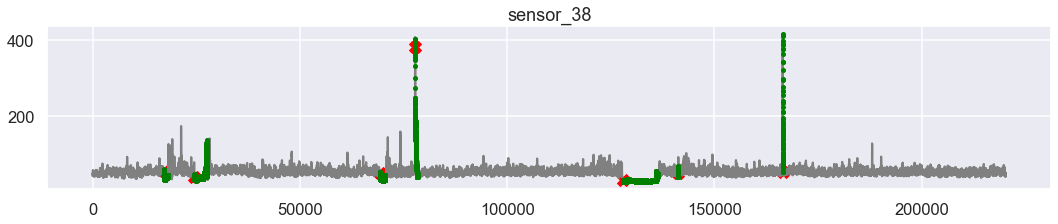

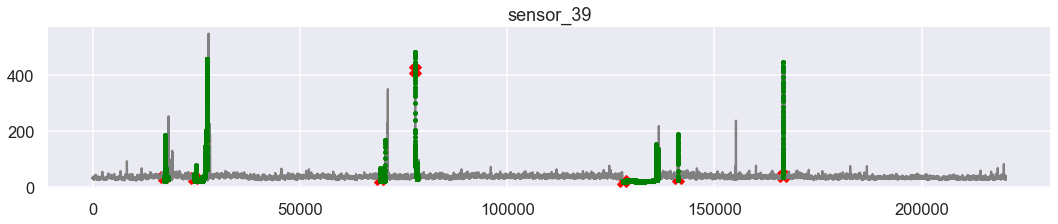

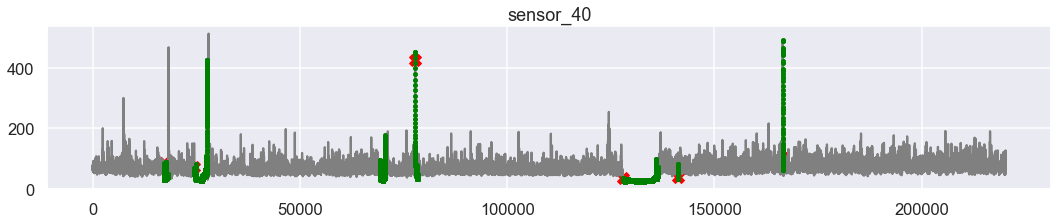

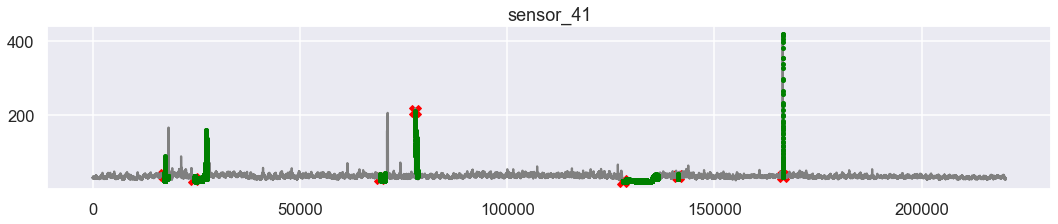

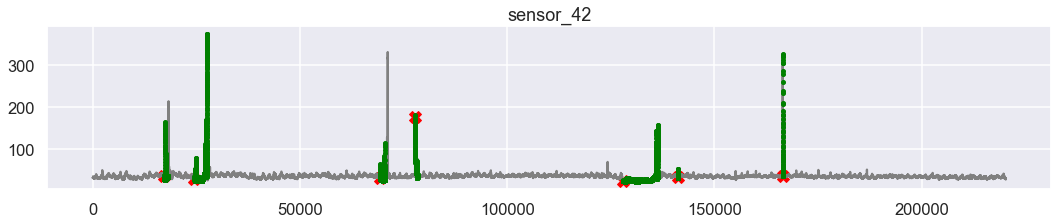

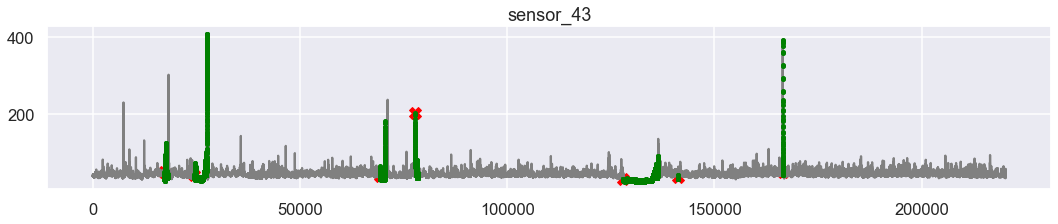

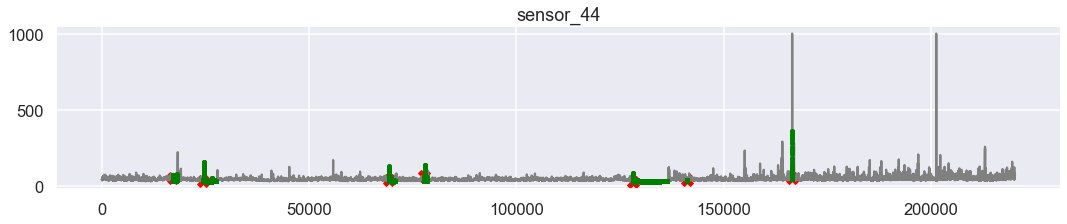

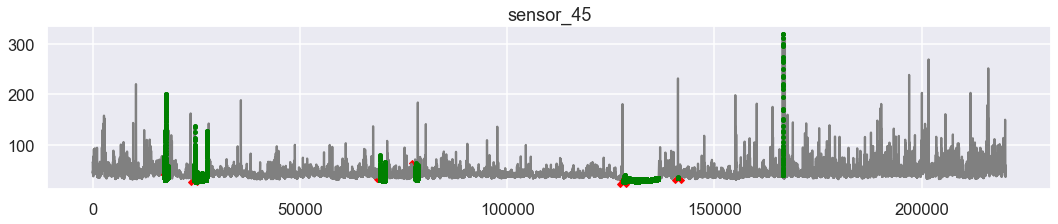

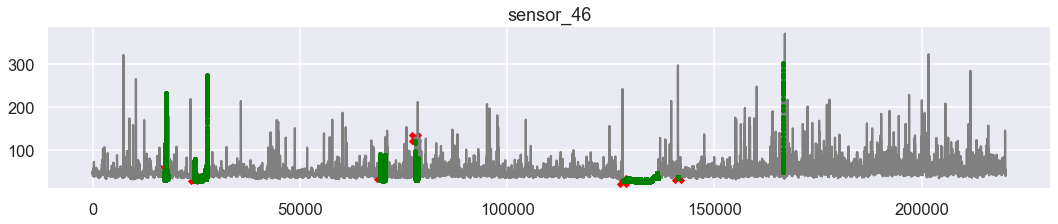

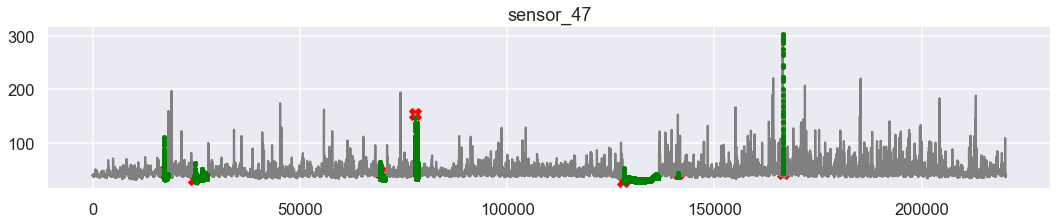

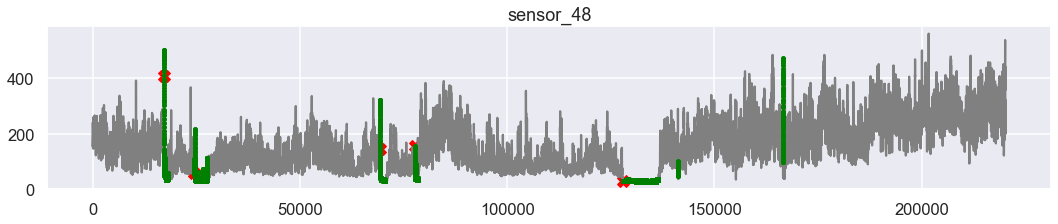

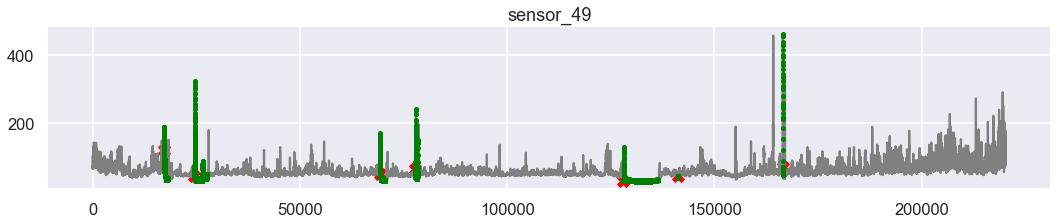

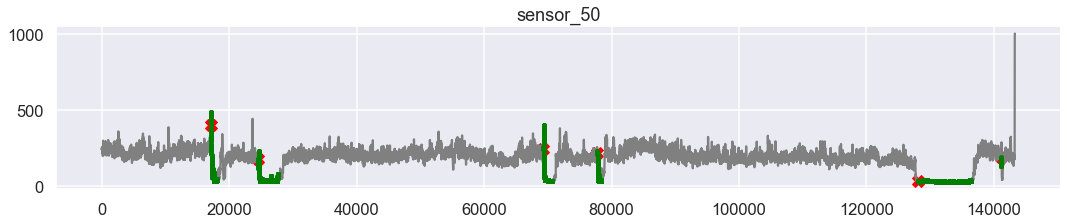

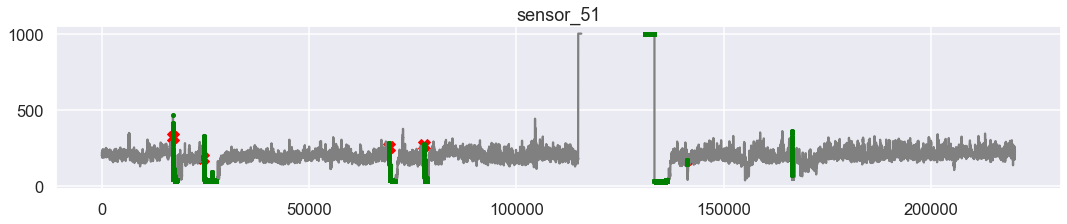

In [18]:
# Erstellung von Dataframes über Filter der verschiedenen Maschinenstatus
dfBroken = df_plots[df_plots['machine_status']==1]
dfRecovery = df_plots[df_plots["machine_status"]==2]
dfSensors = df_plots.drop(['machine_status'], axis=1)
sensorNames = dfSensors.columns[1:]

# Erstellung von Plots für jeden Sensor, der den Maschinenstatus über die Zeit ausgibt
for sensor in sensorNames:
    sns.set_context('talk')
    _ = plt.figure(figsize=(18, 3))
    _ = plt.plot(dfBroken[sensor], linestyle='none', marker='X', color='red', markersize=12)
    _ = plt.plot(df_plots[sensor], color='grey')
    _ = plt.plot(dfRecovery[sensor], linestyle='none', marker='.', color='green', markersize=8)
    _ = plt.title(sensor)
    plt.show()

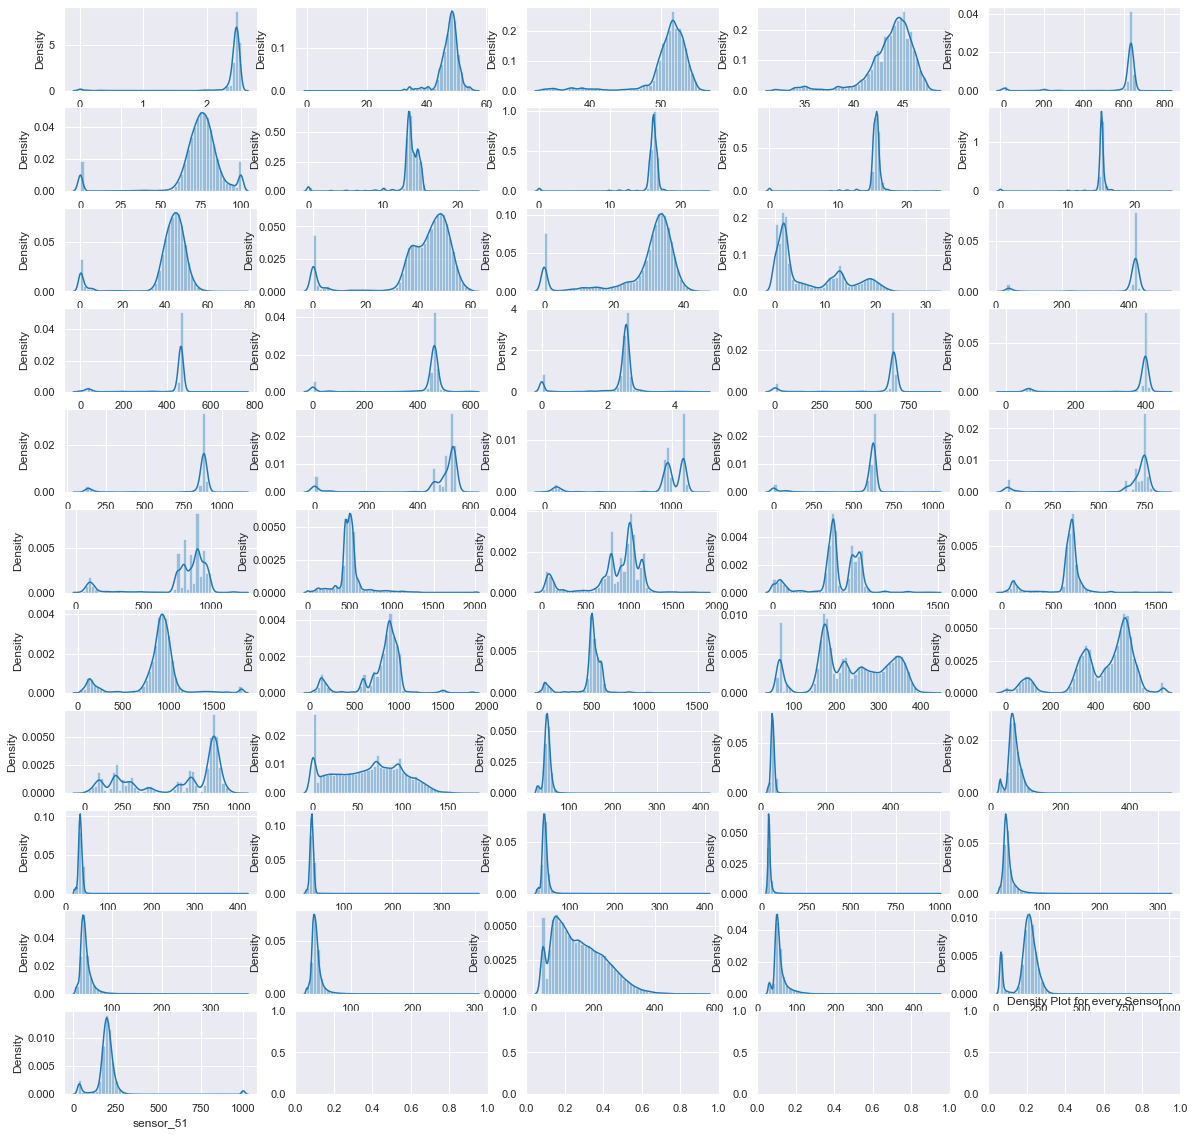

In [19]:
# Erstellung eines Density Plots für jeden Sensor
sns.set_context('notebook')
df_density = df_plots.copy()
df_density.drop(columns=['timestamp', 'machine_status', 'sensor_15'], inplace=True)

fig, axes = plt.subplots(nrows=11, ncols=5, figsize=(20, 20))
plt.title('Density Plot for every Sensor')

col = 0
row = 0

for sensor in df_density.columns:
    sns.distplot(df_density[sensor], ax=axes[row, col])
    if col < 4:
        col += 1
    else:
        col = 0
        row += 1

plt.show()

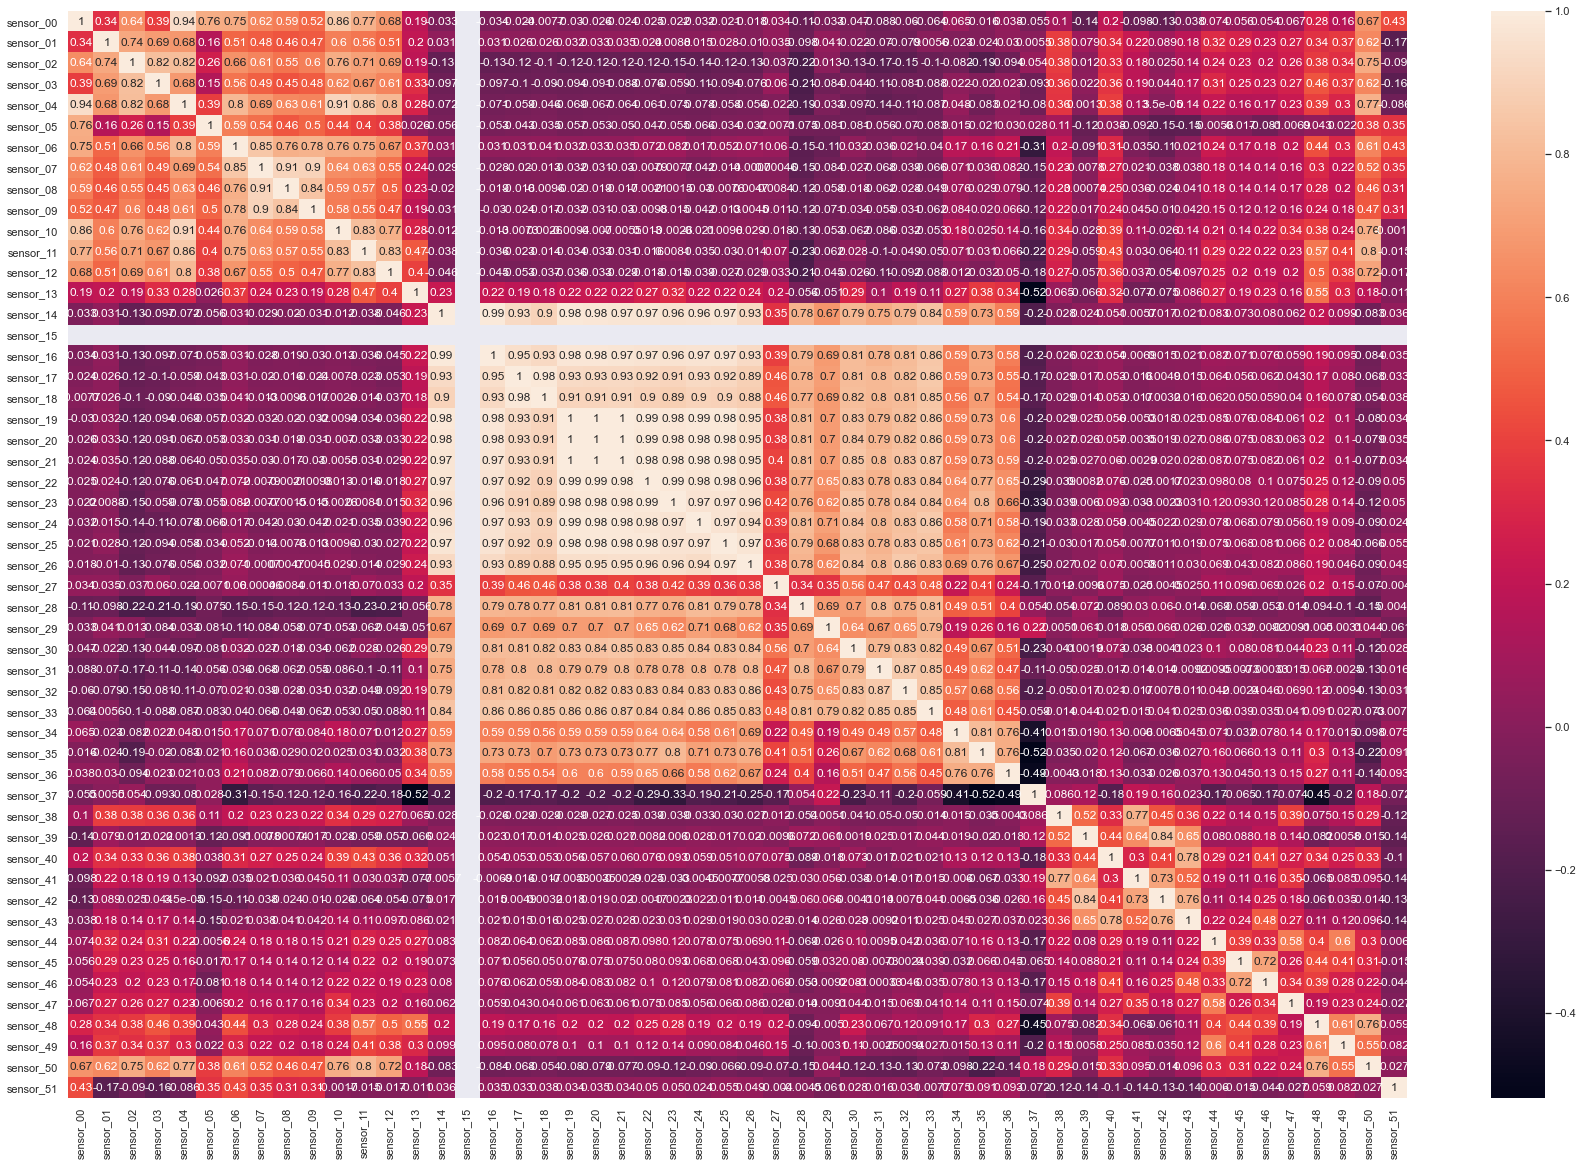

In [20]:
# Erstellung einer Korrelationsmatrix für alle Sensoren
plt.figure(figsize=(30, 20))
corr = df[sensorNames].corr()
sns.heatmap(corr, annot=True)
plt.show()

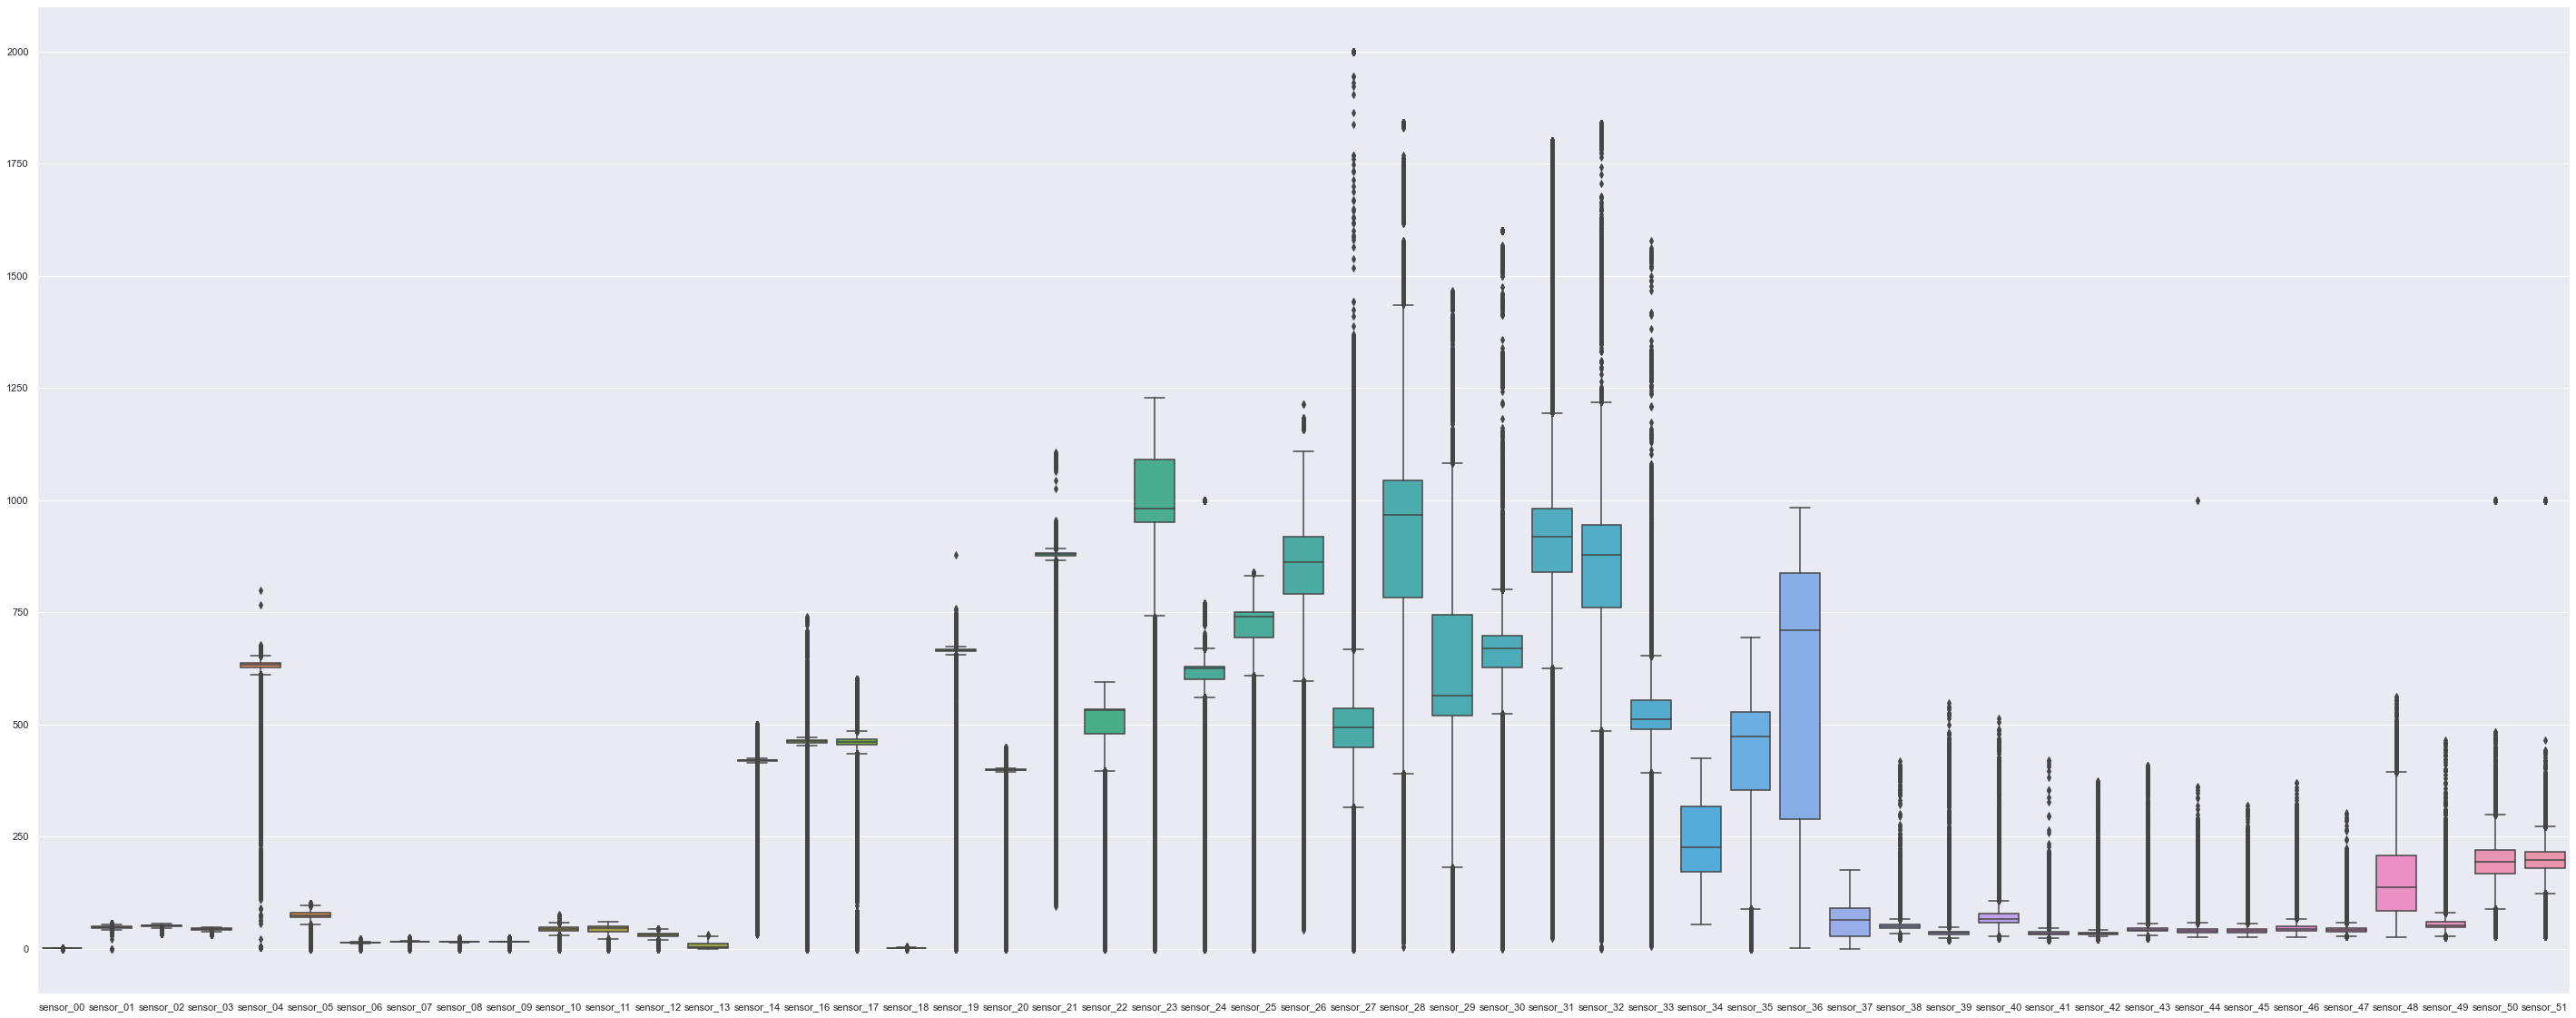

In [21]:
# Darstellung eines Boxblots über alle Sensoren
plt.figure(figsize=(50, 20))
sns.boxplot(data=df_density)
plt.show()

<a class="anchor" id="1.2"></a>
<h3>1.2 Ausreißeranalyse</h3>

In [22]:
# Importieren von Statistikfunktionen aus dem Unterpaket scipy.stats
from scipy import stats

In [23]:
# Erstellung eines neuen DataFrames durch Kopie von dfSesnsors und Löschung der Spalten"timestamp" und "sensor_15"
df_outlier_analysis = dfSensors.copy()
df_outlier_analysis.drop(columns=['timestamp', 'sensor_15'], inplace=True)

In [24]:
# Quelle: https://stackoverflow.com/questions/23199796/
# detect-and-exclude-outliers-in-a-pandas-dataframe#%20detect-and-exclude-outliers-in-a-pandas-dataframe
for sensor in df_outlier_analysis.columns:
    # Fehlende Werte mittels mean ersetzen
    df_outlier_analysis[sensor].fillna((df_outlier_analysis[sensor].mean()), inplace=True)
# Ausreißer mittels z-Score > 3 bestimmen
df_without_outliers = df_outlier_analysis[(np.abs(stats.zscore(df_outlier_analysis)) < 3).all(axis=1)]
print("Number of Outliers detected:", len(df_outlier_analysis) - len(df_without_outliers))

Number of Outliers detected: 55110


<a href='#1'> Zurück zum Anfang des Kapitels</a>

<a href='#Inhaltsverzeichnis'> Zurück zum Inhaltsverzeichnis</a>

<a class="anchor" id="2"></a>
<h1>2 Data Preparation</h1>
<br>Bearbeitet von: Dominik Huber

In [25]:
# Sensor-Datensatz als Pandas Dataframe importieren
df = pd.read_csv(FILEPATH)
df.head()

Unnamed: 0            timestamp  sensor_00  sensor_01  sensor_02  \
0           0  2018-04-01 00:00:00   2.465394   47.09201    53.2118   
1           1  2018-04-01 00:01:00   2.465394   47.09201    53.2118   
2           2  2018-04-01 00:02:00   2.444734   47.35243    53.2118   
3           3  2018-04-01 00:03:00   2.460474   47.09201    53.1684   
4           4  2018-04-01 00:04:00   2.445718   47.13541    53.2118   

   sensor_03  sensor_04  sensor_05  sensor_06  sensor_07  ...  sensor_43  \
0  46.310760   634.3750   76.45975   13.41146   16.13136  ...   41.92708   
1  46.310760   634.3750   76.45975   13.41146   16.13136  ...   41.92708   
2  46.397570   638.8889   73.54598   13.32465   16.03733  ...   41.66666   
3  46.397568   628.1250   76.98898   13.31742   16.24711  ...   40.88541   
4  46.397568   636.4583   76.58897   13.35359   16.21094  ...   41.40625   

   sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  \
0  39.641200   65.68287   50.92593  38.194440   157.9861   67.70834   
1  39.641200   65.68287   50.92593  38.194440   157.9861   67.70834   
2  39.351852   65.39352   51.21528  38.194443   155.9606   67.12963   
3  39.062500   64.81481   51.21528  38.194440   155.9606   66.84028   
4  38.773150   65.10416   51.79398  38.773150   158.2755   66.55093   

   sensor_50  sensor_51  machine_status  
0   243.0556   201.3889          NORMAL  
1   243.0556   201.3889          NORMAL  
2   241.3194   203.7037          NORMAL  
3   240.4514   203.1250          NORMAL  
4   242.1875   201.3889          NORMAL  

[5 rows x 55 columns]

In [26]:
# Unnamed-Spalte entfernen
df.drop(columns=['Unnamed: 0'], inplace=True)

In [27]:
# Datentypen des Dataframes ausgeben
df.dtypes

timestamp          object
sensor_00         float64
sensor_01         float64
sensor_02         float64
sensor_03         float64
sensor_04         float64
sensor_05         float64
sensor_06         float64
sensor_07         float64
sensor_08         float64
sensor_09         float64
sensor_10         float64
sensor_11         float64
sensor_12         float64
sensor_13         float64
sensor_14         float64
sensor_15         float64
sensor_16         float64
sensor_17         float64
sensor_18         float64
sensor_19         float64
sensor_20         float64
sensor_21         float64
sensor_22         float64
sensor_23         float64
sensor_24         float64
sensor_25         float64
sensor_26         float64
sensor_27         float64
sensor_28         float64
sensor_29         float64
sensor_30         float64
sensor_31         float64
sensor_32         float64
sensor_33         float64
sensor_34         float64
sensor_35         float64
sensor_36         float64
sensor_37   

In [28]:
# Datentyp der Spalte 'timestamp' von object zu datetime umwandeln
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')

In [29]:
# Datentyp der Spalte 'machine_status' durch mapping von object zu int umwandeln
mapping = {'NORMAL': 0, 'BROKEN': 1, 'RECOVERING': 2}
df['machine_status'] = df['machine_status'].map(mapping).astype(int)
df.head()

timestamp  sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
0 2018-04-01 00:00:00   2.465394   47.09201    53.2118  46.310760   634.3750   
1 2018-04-01 00:01:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2 2018-04-01 00:02:00   2.444734   47.35243    53.2118  46.397570   638.8889   
3 2018-04-01 00:03:00   2.460474   47.09201    53.1684  46.397568   628.1250   
4 2018-04-01 00:04:00   2.445718   47.13541    53.2118  46.397568   636.4583   

   sensor_05  sensor_06  sensor_07  sensor_08  ...  sensor_43  sensor_44  \
0   76.45975   13.41146   16.13136   15.56713  ...   41.92708  39.641200   
1   76.45975   13.41146   16.13136   15.56713  ...   41.92708  39.641200   
2   73.54598   13.32465   16.03733   15.61777  ...   41.66666  39.351852   
3   76.98898   13.31742   16.24711   15.69734  ...   40.88541  39.062500   
4   76.58897   13.35359   16.21094   15.69734  ...   41.40625  38.773150   

   sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  sensor_50  \
0   65.68287   50.92593  38.194440   157.9861   67.70834   243.0556   
1   65.68287   50.92593  38.194440   157.9861   67.70834   243.0556   
2   65.39352   51.21528  38.194443   155.9606   67.12963   241.3194   
3   64.81481   51.21528  38.194440   155.9606   66.84028   240.4514   
4   65.10416   51.79398  38.773150   158.2755   66.55093   242.1875   

   sensor_51  machine_status  
0   201.3889               0  
1   201.3889               0  
2   203.7037               0  
3   203.1250               0  
4   201.3889               0  

[5 rows x 54 columns]

In [30]:
# Datentypen des Dataframes zur Kontrolle ausgeben
df.dtypes

timestamp         datetime64[ns]
sensor_00                float64
sensor_01                float64
sensor_02                float64
sensor_03                float64
sensor_04                float64
sensor_05                float64
sensor_06                float64
sensor_07                float64
sensor_08                float64
sensor_09                float64
sensor_10                float64
sensor_11                float64
sensor_12                float64
sensor_13                float64
sensor_14                float64
sensor_15                float64
sensor_16                float64
sensor_17                float64
sensor_18                float64
sensor_19                float64
sensor_20                float64
sensor_21                float64
sensor_22                float64
sensor_23                float64
sensor_24                float64
sensor_25                float64
sensor_26                float64
sensor_27                float64
sensor_28                float64
sensor_29 

In [31]:
# Auf NA-Values prüfen und absteigen sortieren
calculate_advanced_info_per_column(df).sort_values(by='percentNA', ascending=False)

colName  non-null values  null values  percentNA  unique  \
16       sensor_15                0       220320   1.000000       0   
51       sensor_50           143303        77017   0.349569    1135   
52       sensor_51           204937        15383   0.069821    1108   
1        sensor_00           210112        10208   0.046333    1253   
8        sensor_07           214869         5451   0.024741     531   
9        sensor_08           215213         5107   0.023180     626   
7        sensor_06           215522         4798   0.021777     812   
10       sensor_09           215725         4595   0.020856     565   
2        sensor_01           219951          369   0.001675     831   
31       sensor_30           220059          261   0.001185    2070   
30       sensor_29           220248           72   0.000327  201908   
33       sensor_32           220252           68   0.000309  205414   
19       sensor_18           220274           46   0.000209  152603   
18       sensor_17           220274           46   0.000209  148000   
23       sensor_22           220279           41   0.000186  126401   
26       sensor_25           220284           36   0.000163  165999   
17       sensor_16           220289           31   0.000141  110522   
50       sensor_49           220293           27   0.000123     827   
49       sensor_48           220293           27   0.000123    1440   
48       sensor_47           220293           27   0.000123     621   
47       sensor_46           220293           27   0.000123     845   
46       sensor_45           220293           27   0.000123     675   
45       sensor_44           220293           27   0.000123     628   
44       sensor_43           220293           27   0.000123     713   
43       sensor_42           220293           27   0.000123     699   
42       sensor_41           220293           27   0.000123     594   
41       sensor_40           220293           27   0.000123     878   
40       sensor_39           220293           27   0.000123     909   
39       sensor_38           220293           27   0.000123     602   
15       sensor_14           220299           21   0.000095   94564   
27       sensor_26           220300           20   0.000091  179718   
4        sensor_03           220301           19   0.000086     588   
11       sensor_10           220301           19   0.000086  198804   
14       sensor_13           220301           19   0.000086  191983   
13       sensor_12           220301           19   0.000086  187145   
12       sensor_11           220301           19   0.000086  196368   
6        sensor_05           220301           19   0.000086  190751   
5        sensor_04           220301           19   0.000086    7844   
3        sensor_02           220301           19   0.000086     831   
37       sensor_36           220304           16   0.000073  201437   
38       sensor_37           220304           16   0.000073  188898   
29       sensor_28           220304           16   0.000073  189278   
28       sensor_27           220304           16   0.000073  203198   
32       sensor_31           220304           16   0.000073    2685   
36       sensor_35           220304           16   0.000073  201781   
25       sensor_24           220304           16   0.000073  133778   
24       sensor_23           220304           16   0.000073  119286   
35       sensor_34           220304           16   0.000073  203895   
22       sensor_21           220304           16   0.000073  131083   
21       sensor_20           220304           16   0.000073   92129   
20       sensor_19           220304           16   0.000073  100422   
34       sensor_33           220304           16   0.000073  200855   
0        timestamp           220320            0   0.000000  220320   
53  machine_status           220320            0   0.000000       3   

             dtype  
16         float64  
51         float64  
52         float64  
1          float64  


<b>Beobachtungen</b>:
<ul>
    <li>Sensor 15 hat nur NaN-Werte --> entfernen</li>
    <li>Sensor 50 hat 30% NaN-Werte --> entfernen</li>
    <li>Bei allen anderen Sensoren werden die NaN-Werte durch den Median der Spalte ersetzt</li>
</ul>

In [32]:
# Spalten 'sensor_15' und 'sensor_50' entfernen
df.drop(columns=['sensor_15', 'sensor_50'], inplace=True)

In [33]:
# Zur Kontrolle auf NA-Values erneut prüfen und absteigen sortieren
calculate_advanced_info_per_column(df).sort_values(by='percentNA', ascending=False)

colName  non-null values  null values  percentNA  unique  \
50       sensor_51           204937        15383   0.069821    1108   
1        sensor_00           210112        10208   0.046333    1253   
8        sensor_07           214869         5451   0.024741     531   
9        sensor_08           215213         5107   0.023180     626   
7        sensor_06           215522         4798   0.021777     812   
10       sensor_09           215725         4595   0.020856     565   
2        sensor_01           219951          369   0.001675     831   
30       sensor_30           220059          261   0.001185    2070   
29       sensor_29           220248           72   0.000327  201908   
32       sensor_32           220252           68   0.000309  205414   
18       sensor_18           220274           46   0.000209  152603   
17       sensor_17           220274           46   0.000209  148000   
22       sensor_22           220279           41   0.000186  126401   
25       sensor_25           220284           36   0.000163  165999   
16       sensor_16           220289           31   0.000141  110522   
41       sensor_41           220293           27   0.000123     594   
40       sensor_40           220293           27   0.000123     878   
43       sensor_43           220293           27   0.000123     713   
44       sensor_44           220293           27   0.000123     628   
39       sensor_39           220293           27   0.000123     909   
38       sensor_38           220293           27   0.000123     602   
45       sensor_45           220293           27   0.000123     675   
46       sensor_46           220293           27   0.000123     845   
47       sensor_47           220293           27   0.000123     621   
48       sensor_48           220293           27   0.000123    1440   
42       sensor_42           220293           27   0.000123     699   
49       sensor_49           220293           27   0.000123     827   
15       sensor_14           220299           21   0.000095   94564   
26       sensor_26           220300           20   0.000091  179718   
3        sensor_02           220301           19   0.000086     831   
4        sensor_03           220301           19   0.000086     588   
5        sensor_04           220301           19   0.000086    7844   
6        sensor_05           220301           19   0.000086  190751   
11       sensor_10           220301           19   0.000086  198804   
12       sensor_11           220301           19   0.000086  196368   
13       sensor_12           220301           19   0.000086  187145   
14       sensor_13           220301           19   0.000086  191983   
19       sensor_19           220304           16   0.000073  100422   
27       sensor_27           220304           16   0.000073  203198   
28       sensor_28           220304           16   0.000073  189278   
37       sensor_37           220304           16   0.000073  188898   
36       sensor_36           220304           16   0.000073  201437   
35       sensor_35           220304           16   0.000073  201781   
34       sensor_34           220304           16   0.000073  203895   
33       sensor_33           220304           16   0.000073  200855   
21       sensor_21           220304           16   0.000073  131083   
31       sensor_31           220304           16   0.000073    2685   
23       sensor_23           220304           16   0.000073  119286   
24       sensor_24           220304           16   0.000073  133778   
20       sensor_20           220304           16   0.000073   92129   
0        timestamp           220320            0   0.000000  220320   
51  machine_status           220320            0   0.000000       3   

             dtype  
50         float64  
1          float64  
8          float64  
9          float64  
7          float64  
10         float64  
2          float64  
30         float64  
29         float64  
32         float64  
18         float

In [34]:
# Verbliebene NaN-Werte der Sensoren mit durch den Median der Spalte ersetzen
for column in df.columns[1:-1]:
    df[column].fillna((df[column].median()), inplace=True)

In [35]:
# Zur Kontrolle erneut auf NA-Werte prüfen
calculate_advanced_info_per_column(df)

colName  non-null values  null values  percentNA  unique  \
0        timestamp           220320            0        0.0  220320   
1        sensor_00           220320            0        0.0    1253   
2        sensor_01           220320            0        0.0     831   
3        sensor_02           220320            0        0.0     831   
4        sensor_03           220320            0        0.0     588   
5        sensor_04           220320            0        0.0    7844   
6        sensor_05           220320            0        0.0  190751   
7        sensor_06           220320            0        0.0     812   
8        sensor_07           220320            0        0.0     531   
9        sensor_08           220320            0        0.0     626   
10       sensor_09           220320            0        0.0     565   
11       sensor_10           220320            0        0.0  198804   
12       sensor_11           220320            0        0.0  196368   
13       sensor_12           220320            0        0.0  187145   
14       sensor_13           220320            0        0.0  191983   
15       sensor_14           220320            0        0.0   94564   
16       sensor_16           220320            0        0.0  110522   
17       sensor_17           220320            0        0.0  148001   
18       sensor_18           220320            0        0.0  152604   
19       sensor_19           220320            0        0.0  100422   
20       sensor_20           220320            0        0.0   92129   
21       sensor_21           220320            0        0.0  131083   
22       sensor_22           220320            0        0.0  126401   
23       sensor_23           220320            0        0.0  119286   
24       sensor_24           220320            0        0.0  133778   
25       sensor_25           220320            0        0.0  165999   
26       sensor_26           220320            0        0.0  179719   
27       sensor_27           220320            0        0.0  203199   
28       sensor_28           220320            0        0.0  189279   
29       sensor_29           220320            0        0.0  201909   
30       sensor_30           220320            0        0.0    2070   
31       sensor_31           220320            0        0.0    2685   
32       sensor_32           220320            0        0.0  205415   
33       sensor_33           220320            0        0.0  200856   
34       sensor_34           220320            0        0.0  203896   
35       sensor_35           220320            0        0.0  201782   
36       sensor_36           220320            0        0.0  201438   
37       sensor_37           220320            0        0.0  188899   
38       sensor_38           220320            0        0.0     602   
39       sensor_39           220320            0        0.0     909   
40       sensor_40           220320            0        0.0     878   
41       sensor_41           220320            0        0.0     594   
42       sensor_42           220320            0        0.0     699   
43       sensor_43           220320            0        0.0     713   
44       sensor_44           220320            0        0.0     628   
45       sensor_45           220320            0        0.0     675   
46       sensor_46           220320            0        0.0     845   
47       sensor_47           220320            0        0.0     621   
48       sensor_48           220320            0        0.0    1440   
49       sensor_49           220320            0        0.0     827   
50       sensor_51           220320            0        0.0    1108   
51  machine_status           220320            0        0.0       3   

             dtype  
0   datetime64[ns]  
1          float64  
2          float64  
3          float64  
4          float64  
5          float64  
6          float64  
7          float64  
8          float64  
9          float64  
10         float

In [36]:
# Spalte 'timestamp' als Index des Dataframes setzen und zur Kontrolle ausgeben
df.set_index('timestamp', inplace=True)
df.head()

sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
timestamp                                                                    
2018-04-01 00:00:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:01:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:02:00   2.444734   47.35243    53.2118  46.397570   638.8889   
2018-04-01 00:03:00   2.460474   47.09201    53.1684  46.397568   628.1250   
2018-04-01 00:04:00   2.445718   47.13541    53.2118  46.397568   636.4583   

                     sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
timestamp                                                                    
2018-04-01 00:00:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:01:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:02:00   73.54598   13.32465   16.03733   15.61777   15.01013   
2018-04-01 00:03:00   76.98898   13.31742   16.24711   15.69734   15.08247   
2018-04-01 00:04:00   76.58897   13.35359   16.21094   15.69734   15.08247   

                     ...  sensor_42  sensor_43  sensor_44  sensor_45  \
timestamp            ...                                               
2018-04-01 00:00:00  ...  31.770832   41.92708  39.641200   65.68287   
2018-04-01 00:01:00  ...  31.770832   41.92708  39.641200   65.68287   
2018-04-01 00:02:00  ...  31.770830   41.66666  39.351852   65.39352   
2018-04-01 00:03:00  ...  31.510420   40.88541  39.062500   64.81481   
2018-04-01 00:04:00  ...  31.510420   41.40625  38.773150   65.10416   

                     sensor_46  sensor_47  sensor_48  sensor_49  sensor_51  \
timestamp                                                                    
2018-04-01 00:00:00   50.92593  38.194440   157.9861   67.70834   201.3889   
2018-04-01 00:01:00   50.92593  38.194440   157.9861   67.70834   201.3889   
2018-04-01 00:02:00   51.21528  38.194443   155.9606   67.12963   203.7037   
2018-04-01 00:03:00   51.21528  38.194440   155.9606   66.84028   203.1250   
2018-04-01 00:04:00   51.79398  38.773150   158.2755   66.55093   201.3889   

                     machine_status  
timestamp                            
2018-04-01 00:00:00               0  
2018-04-01 00:01:00               0  
2018-04-01 00:02:00               0  
2018-04-01 00:03:00               0  
2018-04-01 00:04:00               0  

[5 rows x 51 columns]

In [37]:
# # Ausreißer mit Hilfe des Z-Scores identifizieren und entfernen
# for sensor in df.columns:
    # df_prepared = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
# print("Number of Outliers removed:", len(df) - len(df_prepared))

Das Entfernen der Ausreißer wurde nicht durchgeführt, da hierdurch ca. 55.000 Zeilen entfernt worden wären (siehe 1.2 Ausreißeranalyse). Dies beinhaltete auch alle Datenpunkte mit dem Maschinenstatus ‚Recovering‘, was hinderlich für die Anwendung von ML-Algorithmen wäre, da eine ganze Klasse nicht mehr im Datensatz abgebildet wäre.

In [38]:
# Dimensionalität des Dataframes ausgeben, um erfolgreiches Entfernen der Ausreißer zu kontrollieren
df.shape

(220320, 51)

<a class="anchor" id="2.1"></a>
<h5>2.1 Dummy-Variable für Machine-Status anlegen</h5>

In [39]:
# Drei Klassen der Spalte 'machine_status' in Dummy-Variablen umwandeln und im Dataframe dummies speichern
dummies = pd.get_dummies(data=df, prefix='machineStatus', columns=['machine_status'], drop_first=False)

In [40]:
# Auf die drei aus der Spalte 'machine_status' neu generierten Spalten zugreifen und im Dataframe dummies speichern
dummies = dummies.iloc[:, -3:]

In [42]:
# Die beiden Dataframes df und dummies mit einem Inner-Join zusammenführen und als neuen Dataframe df_prepared speichern
df_prepared = pd.merge(left=df, right=dummies, on='timestamp', how='inner')

In [43]:
# Dimensionalität des Dataframes ausgeben, um erfolgreiches Zusammenführen zu kontrollieren
df_prepared.shape

(220320, 54)

In [44]:
# Erste fünf Zeilen des neuen Dataframes ausgeben
df_prepared.head()

sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
timestamp                                                                    
2018-04-01 00:00:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:01:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:02:00   2.444734   47.35243    53.2118  46.397570   638.8889   
2018-04-01 00:03:00   2.460474   47.09201    53.1684  46.397568   628.1250   
2018-04-01 00:04:00   2.445718   47.13541    53.2118  46.397568   636.4583   

                     sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
timestamp                                                                    
2018-04-01 00:00:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:01:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:02:00   73.54598   13.32465   16.03733   15.61777   15.01013   
2018-04-01 00:03:00   76.98898   13.31742   16.24711   15.69734   15.08247   
2018-04-01 00:04:00   76.58897   13.35359   16.21094   15.69734   15.08247   

                     ...  sensor_45  sensor_46  sensor_47  sensor_48  \
timestamp            ...                                               
2018-04-01 00:00:00  ...   65.68287   50.92593  38.194440   157.9861   
2018-04-01 00:01:00  ...   65.68287   50.92593  38.194440   157.9861   
2018-04-01 00:02:00  ...   65.39352   51.21528  38.194443   155.9606   
2018-04-01 00:03:00  ...   64.81481   51.21528  38.194440   155.9606   
2018-04-01 00:04:00  ...   65.10416   51.79398  38.773150   158.2755   

                     sensor_49  sensor_51  machine_status  machineStatus_0  \
timestamp                                                                    
2018-04-01 00:00:00   67.70834   201.3889               0                1   
2018-04-01 00:01:00   67.70834   201.3889               0                1   
2018-04-01 00:02:00   67.12963   203.7037               0                1   
2018-04-01 00:03:00   66.84028   203.1250               0                1   
2018-04-01 00:04:00   66.55093   201.3889               0                1   

                     machineStatus_1  machineStatus_2  
timestamp                                              
2018-04-01 00:00:00                0                0  
2018-04-01 00:01:00                0                0  
2018-04-01 00:02:00                0                0  
2018-04-01 00:03:00                0                0  
2018-04-01 00:04:00                0                0  

[5 rows x 54 columns]

In [45]:
# Datentypen des neuen Dataframes ausgeben
df_prepared.dtypes

sensor_00          float64
sensor_01          float64
sensor_02          float64
sensor_03          float64
sensor_04          float64
sensor_05          float64
sensor_06          float64
sensor_07          float64
sensor_08          float64
sensor_09          float64
sensor_10          float64
sensor_11          float64
sensor_12          float64
sensor_13          float64
sensor_14          float64
sensor_16          float64
sensor_17          float64
sensor_18          float64
sensor_19          float64
sensor_20          float64
sensor_21          float64
sensor_22          float64
sensor_23          float64
sensor_24          float64
sensor_25          float64
sensor_26          float64
sensor_27          float64
sensor_28          float64
sensor_29          float64
sensor_30          float64
sensor_31          float64
sensor_32          float64
sensor_33          float64
sensor_34          float64
sensor_35          float64
sensor_36          float64
sensor_37          float64
s

<a class="anchor" id="2.2"></a>
<h5>2.2 Aufsplitten in Features und Target Variable</h5>

In [46]:
# Features extrahieren
X = df_prepared.iloc[:, :-3]
# Zielvariablen extrahieren
y_one_hot = df_prepared.iloc[:, -3:]  # 'machine_status' als Dummy-Variable (One-Hot-Encodiert)
y_one_col = df_prepared.iloc[:, -4:-3]  # 'machine_status' als eine int-Spalte

In [47]:
# Dimensionalität ausgeben, um Extrahierung zu kontrollieren
print(X.shape)
print(y_one_hot.shape)
print(y_one_col.shape)

(220320, 51)
(220320, 3)
(220320, 1)


<a href='#2'> Zurück zum Anfang des Kapitels</a>

<a href='#Inhaltsverzeichnis'> Zurück zum Inhaltsverzeichnis</a>

<a class="anchor" id="3"></a>
<h2>3 Model Data</h2>
<br>Bearbeitet von: Nils Heimbach, Christian Seidler

<a class="anchor" id="3.1"></a>
<h3>3.1 Dimensionsreduzierung</h3>

In [48]:
# Importieren der benötigen Libraries für die Dimensionsreduzierung
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [49]:
# Merkmale skalieren
X_scaled = StandardScaler().fit_transform(X)

# Dimensionsreduzierung durchführen
pca = PCA(n_components=6)
X_reduced = pca.fit_transform(X_scaled)
# Anzahl der PCA-Komponenten abspeichern
n_components = len(X_reduced[0])
print(n_components)
print(pca.explained_variance_ratio_)

6
[0.34282437 0.1960291  0.08467086 0.05469524 0.04250957 0.03244075]


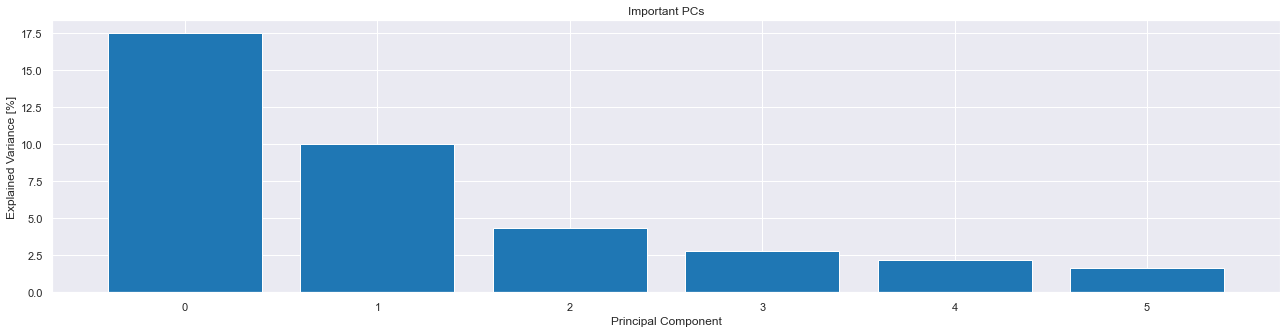

In [50]:
# Darstellung der erklärten Varianz der verwendeten PCs als Balkendiagramm
features = range(n_components)
_ = plt.figure(figsize=(22, 5))
_ = plt.bar(features, pca.explained_variance_)
_ = plt.xlabel('Principal Component')
_ = plt.ylabel('Explained Variance [%]')
_ = plt.xticks(features)
_ = plt.title('Important PCs')
plt.show()

<a class="anchor" id="3.2"></a>
<h3>3.2 Train-Test-Split</h3>

In [64]:
# Importieren der Funktion für den train_test_split
from sklearn.model_selection import train_test_split

In [65]:
# Anwenden des train_test_splits mit 70/30
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_one_col, test_size=0.30, random_state=14,
                                                    stratify=y_one_col)

<a class="anchor" id="3.3"></a>
<h3>3.3 Anwenden von Algorithmen zur Klassifikation</h3>

In [66]:
# Importieren der benötigten Libraries für zur Anwendung der Klassifikations-Algorithmen
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier

In [67]:
# Definition eines Dictionaries mit den verschiedenen Parameteren der Algorithmen
# Dazu gehört der Lineare_SVC, Random_forest, Ridge_classifier
CLASSIFICATION_MODELS = {'Linear_SVC': SVC(kernel='linear', C=0.025, random_state=14),
                         'Random_Forest':
                          RandomForestClassifier(max_depth=10,
                                                 n_estimators=20,
                                                 max_features=1,
                                                 random_state=14,
                                                ),
                         'Ridge_Classifier': RidgeClassifier(random_state=14,
                                                            alpha=10)
                        }

In [68]:
# Importieren der benötigten Libraries für zur Bewertung der Algorithmen
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [69]:
# Funktion zum Testen des Modells
def score_model(y_pred, y_test):
    """Berechnung und Ausgabe von Metriken der Klassifikation für Multi-Class-Probleme"""
    recall = metrics.recall_score(y_test, y_pred, average='weighted', zero_division=1)
    precision = metrics.precision_score(y_test, y_pred, average='weighted', zero_division=1)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred, average='weighted', zero_division=1)

    # Standardmetriken
    print('Recall:', recall)
    print('Precision:', precision)
    print('Accuracy:', accuracy)
    print('F1-Score:', f1_score)

    # Konfusionsmatrix
    print(metrics.confusion_matrix(y_test, y_pred))

    # Zusammenfassende Statistik
    print(metrics.classification_report(y_test, y_pred, zero_division=1))

In [70]:
# Funktion zur Erstellung der ROC-Kurve
def show_roc_curve(y_testset, predictions, title=None):
    """Anzeigen der ROC-Kurve für ein Multi-Class-Problem """
    # Multiindex zurücksetzen
    machine_status = y_testset.reset_index()

    # Index für einzelne Klassen extrahieren
    index_0 = machine_status[machine_status.machine_status == 0].index
    index_1 = machine_status[machine_status.machine_status == 1].index
    index_2 = machine_status[machine_status.machine_status == 2].index

    # Wahre y-Werte bestimmen
    y_true_0 = machine_status.iloc[index_0].machine_status.to_numpy()
    y_true_1 = machine_status.iloc[index_1].machine_status.to_numpy()
    y_true_2 = machine_status.iloc[index_2].machine_status.to_numpy()

    # Vorhergesagte y-Werte bestimmen
    y_score_0 = predictions[index_0]
    y_score_1 = predictions[index_1]
    y_score_2 = predictions[index_2]

    # ROC-Kurve erzeugen
    y_score = label_binarize(y_testset, classes=[0, 1, 2])
    n_classes = y_score.shape[1]
    y_test = label_binarize(predictions, classes=[0, 1, 2])

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

    # plt.figure()
    lw = 2

    # Quelle: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = metrics.auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    # plt.figure()
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
        color="navy",
        linestyle=":",
        linewidth=4,
    )

    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=lw,
            label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
        )

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    if title is None:
        plt.title('ROC-Curve for Testset')
    else:
        plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

Model Summary for model Linear_SVC
Recall: 0.9950375211813121
Precision: 0.9951933308966711
Accuracy: 0.9950375211813121
F1-Score: 0.9950703910541686
[[61495     0   256]
 [    2     0     0]
 [   70     0  4273]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61751
           1       1.00      0.00      0.00         2
           2       0.94      0.98      0.96      4343

    accuracy                           1.00     66096
   macro avg       0.98      0.66      0.65     66096
weighted avg       1.00      1.00      1.00     66096



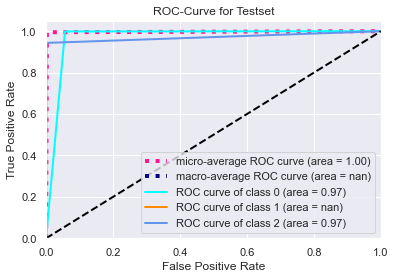

Model Summary for model Random_Forest
Recall: 0.9986837327523602
Precision: 0.9986816901824395
Accuracy: 0.9986837327523602
F1-Score: 0.9986671674382405
[[61719     0    32]
 [    2     0     0]
 [   53     0  4290]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61751
           1       1.00      0.00      0.00         2
           2       0.99      0.99      0.99      4343

    accuracy                           1.00     66096
   macro avg       1.00      0.66      0.66     66096
weighted avg       1.00      1.00      1.00     66096



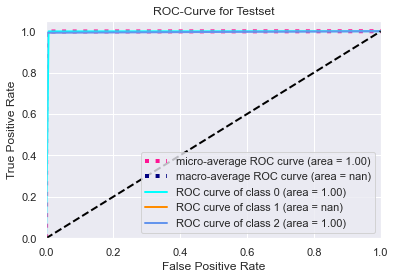

Model Summary for model Ridge_Classifier
Recall: 0.9915728637133866
Precision: 0.992199960054588
Accuracy: 0.9915728637133866
F1-Score: 0.9917341921811041
[[61268     0   483]
 [    1     0     1]
 [   72     0  4271]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     61751
           1       1.00      0.00      0.00         2
           2       0.90      0.98      0.94      4343

    accuracy                           0.99     66096
   macro avg       0.97      0.66      0.64     66096
weighted avg       0.99      0.99      0.99     66096



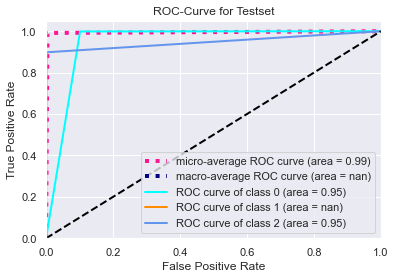

In [71]:
# Iteration durch das Dictionary "CLASSSFICATION_MODELS" und Anwendung dieser Algorithmen 
# ohne Gewichtung
for name, model in CLASSIFICATION_MODELS.items():
    print('Model Summary for model', name)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Anwenden der beiden Funktionen um die Qualität des Modells zu überprüfen
    score_model(predictions, y_test)
    show_roc_curve(y_test, predictions)

<b>Beobachtung</b>:
<br>Die Klasse 'broken' wird von allen Modellen ignoriert. Dies liegt daran, dass diese Klasse mit 7 Datenpunkten im
gesamten Datensatz stark unterrepräsentiert ist.
<br>
<br><b>Lösungsansatz</b>:
<br>Einführen von Gewichten für jede einzelne Klasse des 'machine_status'. Wenn die Klasse 'borken' eine deutlich höhere
Gewichtung als alle anderen Klassen erhält, berücksichtigen die Modelle die Klasse 'broken' vielleicht eher.

In [72]:
# Definition eines Dictionaries mit den verschiedenen Parameteren der Algorithmen mit Gewichtung
# Dazu gehört der Lineare_SVC, Random_forest, Ridge_classifier
CLASS_WEIGHTS = {0: 0.2, 1: 100, 2: 0.5}
WEITGH_CLASSIFICATION_MODELS = {'Linear_SVC': SVC(kernel="linear", C=0.025, random_state=14,
                                                  class_weight=CLASS_WEIGHTS),
                                 'Random_Forest':
                                  RandomForestClassifier(max_depth=10,
                                                         n_estimators=20,
                                                         max_features=1,
                                                         random_state=14,
                                                         class_weight=CLASS_WEIGHTS
                                                        ),
                                 'Ridge_Classifier': RidgeClassifier(random_state=14,
                                                                    class_weight=CLASS_WEIGHTS,
                                                                    alpha=10)
                                }

Model Summary for model Linear_SVC
Recall: 0.9937212539336723
Precision: 0.9941853457261377
Accuracy: 0.9937212539336723
F1-Score: 0.9938720264755937
[[61385     8   358]
 [    2     0     0]
 [   46     1  4296]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     61751
           1       0.00      0.00      0.00         2
           2       0.92      0.99      0.95      4343

    accuracy                           0.99     66096
   macro avg       0.64      0.66      0.65     66096
weighted avg       0.99      0.99      0.99     66096



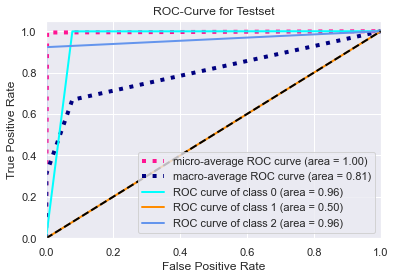

Model Summary for model Random_Forest
Recall: 0.9974885015734689
Precision: 0.9975290141731763
Accuracy: 0.9974885015734689
F1-Score: 0.9974857181868398
[[61622     0   129]
 [    2     0     0]
 [   35     0  4308]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61751
           1       1.00      0.00      0.00         2
           2       0.97      0.99      0.98      4343

    accuracy                           1.00     66096
   macro avg       0.99      0.66      0.66     66096
weighted avg       1.00      1.00      1.00     66096



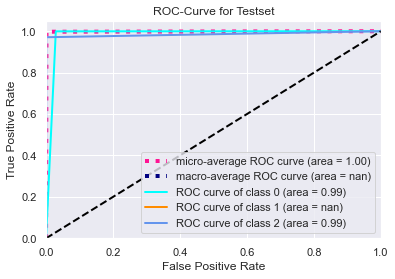

Model Summary for model Ridge_Classifier
Recall: 0.9901053013798112
Precision: 0.9914198955968284
Accuracy: 0.9901053013798112
F1-Score: 0.9904782705223781
[[61122     1   628]
 [    1     0     1]
 [   12    11  4320]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     61751
           1       0.00      0.00      0.00         2
           2       0.87      0.99      0.93      4343

    accuracy                           0.99     66096
   macro avg       0.62      0.66      0.64     66096
weighted avg       0.99      0.99      0.99     66096



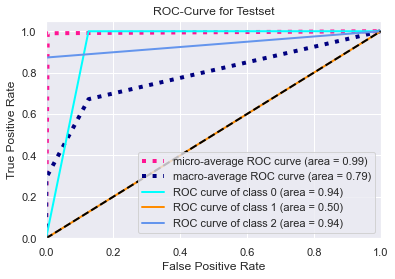

In [73]:
# Iteration durch das Dictionary "CLASSSFICATION_MODELS" und Anwendung dieser Algorithmen 
# mit Gewichtung
for name, model in WEITGH_CLASSIFICATION_MODELS.items():
    print('Model Summary for model', name)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Anwenden der beiden Funktionen um die Qualität des Modells zu überprüfen
    score_model(predictions, y_test)
    show_roc_curve(y_test, predictions)

<b>Beobachtung</b>:
<br>Die Klasse 'broken' wird nun nicht mehr ignoriert. Allerdings wird kein einziger Datenpunkt dieser Klasse korrekt
zugeordet. Es scheint, als haben diese Datenpunkte der Klasse 'broken' wenig Gemeinsamkeiten, so dass die Modelle 
keine Verallgemeinerung für diese Klasse besitzen.
<br>
<br><b>Lösungsansatz</b>:
<br>Weitere Datenpunkte der Klasse 'broken' sind für ein besseres Ergebnis notwendig.

<a class="anchor" id="3.4"></a>
<h3>3.4 Deep-Learning</h3>
<br>Erstellt von: Christian Seidler
<br>Quelle: <a href='https://www.ionos.de/digitalguide/websites/web-entwicklung/keras-tutorial/'>Keras-Tutorial: Deep-Learning Beispiel mit Keras und Python</a>

In [74]:
# Keras laden
from tensorflow import keras
# Sequentielles Modell laden
from keras.models import Sequential
# Ebenen des neuronalen Netzes laden
from keras.layers import Dense, Dropout, Flatten
from keras import backend as K

In [75]:
# Anzahl der Klassen
num_classes = 3
# Anzahl der während eines Durchgangs genutzten Daten
batch_size = 128
# Anzahl der Durchgänge für Training des neuronalen Netzes
epochs = 15

# Klassen-Vektoren in binäre Klassen-Matrizen konvertieren
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Modell erzeugen
model = Sequential()
# Ebenen zum Modell hinzufügen
model.add(Dense(24, input_dim = X_train.shape[1], activation = 'relu')) # input layer requires input_dim param
model.add(Dense(12, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))

# Modell kompilieren
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# Modell trainieren
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

# Modell auswerten
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Vorhersagen treffen
y_pred = model.predict(X_test)
matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(matrix)

Epoch 1/15
1205/1205 [==============================] - 2s 2ms/step - loss: 1.7012 - accuracy: 0.1111 - val_loss: 1.6611 - val_accuracy: 0.1356
Epoch 2/15
1205/1205 [==============================] - 2s 2ms/step - loss: 1.6141 - accuracy: 0.1605 - val_loss: 1.5681 - val_accuracy: 0.1937
Epoch 3/15
1205/1205 [==============================] - 2s 1ms/step - loss: 1.5184 - accuracy: 0.2302 - val_loss: 1.4705 - val_accuracy: 0.2740
Epoch 4/15
1205/1205 [==============================] - 2s 1ms/step - loss: 1.4198 - accuracy: 0.3335 - val_loss: 1.3714 - val_accuracy: 0.4020
Epoch 5/15
1205/1205 [==============================] - 2s 2ms/step - loss: 1.3212 - accuracy: 0.4731 - val_loss: 1.2737 - val_accuracy: 0.5401
Epoch 6/15
1205/1205 [==============================] - 2s 2ms/step - loss: 1.2250 - accuracy: 0.5925 - val_loss: 1.1792 - val_accuracy: 0.6394
Epoch 7/15
1205/1205 [==============================] - 2s 2ms/step - loss: 1.1324 - accuracy: 0.6702 - val_loss: 1.0891 - val_accuracy:

<b>Beobachtung</b>:
<br>Das neuronal Netz berücksichtigt die Klasse 'broken' - im Gegensatz zu den vorherigen Modellen.
Allerdings wird nur ein Datenpunkt der Klasse 'broken' des Testsets korrekt zugeordnet. Die Klasse 'broken' verfügt mit dem neuronalen Netz über eine hohe False-Positive-Rate.

<a class="anchor" id="3.5"></a>
<h3>3.5 Clusteranalyse mit K-Means</h3>

<b>Idee</b>:
<br>Prüfen, ob die Datenpunkte der einzelnen Klassen Gemeinsamkeiten aufweisen. Hierfür wird ein Clustering auf den Datensatz durchgeführt und mit den bekannten Labels geprüft, ob die gefunden Cluster mit den tatsächlichen Klassen übereinstimmen.

In [76]:
# Importieren des Cluster-Modells KMEANS 
from sklearn.cluster import KMeans

In [77]:
# Paramter des kMeans definieren
kmeans = KMeans(n_clusters=3, random_state=42)

In [78]:
# kMeans fitten und predicten
kmeans.fit(X_reduced)
labels = kmeans.predict(X_reduced)

In [79]:
# Im folgenden werden verschiedene Qualitätsmerkmale für den KMEANS gezeigt

In [80]:
score = metrics.adjusted_rand_score(y_one_col['machine_status'], labels)
print("Adjusted Rand Score: {0:.3f}".format(score))

Adjusted Rand Score: 0.464


In [81]:
score = metrics.adjusted_mutual_info_score(y_one_col['machine_status'], labels)
print("Adjusted Mutual Info Score: {0:.3f}".format(score))

Adjusted Mutual Info Score: 0.505


In [82]:
score = metrics.fowlkes_mallows_score(y_one_col['machine_status'], labels)
print("Fowlkes-Mallows Score: {0:.3f}".format(score))

Fowlkes-Mallows Score: 0.885


In [83]:
score = metrics.cluster.contingency_matrix(y_one_col['machine_status'], labels)
print("Contingency Matrix:".format())
print(score)

Contingency Matrix:
[[181056  23208   1572]
 [     4      1      2]
 [   300      0  14177]]


<b>Beobachtung</b>:
<br>Aus den Scores, sowie aus der Kontingenztabelle (entspricht Konfusionsmatrix) geht hervor, dass die gefundenen Cluster nicht mit tatsächlichen Klassen übereinstimmen. Die Klassen sind somit nicht scharf voneinander getrennt - sondern sind überlappend. Auffallend ist, dass die Klasse 'broken' sehr nah an Datenpunkten der Klasse 'normal' ist (ca. 23.000 falsche Zuordnungen!). Das erklärt, warum die Modelle nicht in der Lage sind, die Klasse 'broken' robust zu erkennen. Die Klassen 'normal' und 'recovery' scheinen dagegen wenige Gemeinsamkeiten zu haben, was sich in der geringen Anzahl an falsch zugeordneten Datenpunkten (nur rund 2000) wiederspiegelt. Zudem ist damit die hohe Accuracy der vorherigen Modelle erklärt.

<a class="anchor" id="3.6"></a>
<h3>3.6 Clusteranalyse mit DBSCAN</h3>

In [84]:
# Importieren des Cluster-Algorithmus DBSCAN
from sklearn.cluster import DBSCAN

In [85]:
# Parameter für den DBSCAN definieren
dbscan = DBSCAN(eps=0.5, min_samples=5)

In [86]:
# DBSCAN fitten und predicten
labels = dbscan.fit_predict(X_reduced)

In [87]:
# Im folgenden werden verschiedene Qualitätsmerkmale für den DBSCAN gezeigt

In [88]:
score = metrics.adjusted_rand_score(y_one_col['machine_status'], labels)
print("Adjusted Rand Score: {0:.3f}".format(score))

Adjusted Rand Score: 0.399


In [89]:
score = metrics.adjusted_mutual_info_score(y_one_col['machine_status'], labels)
print("Adjusted Mutual Info Score: {0:.3f}".format(score))

Adjusted Mutual Info Score: 0.337


In [90]:
score = metrics.fowlkes_mallows_score(y_one_col['machine_status'], labels)
print("Fowlkes-Mallows Score: {0:.3f}".format(score))

Fowlkes-Mallows Score: 0.855


<b>Beobachtung</b>:
<br>Die Ergebnisse sind identisch zu den Ergebnissen von k-Means.

<a class="anchor" id="3.7"></a>
<h3>3.7 Anomalieerkennung</h3>
<br>Erstellt von: Nils Heimbach

Quelle: https://www.kaggle.com/code/jhasony/anomaly-detection-in-time-series

<br><b>Idee</b>:
<br>Da die Klasse 'broken' nur über 7 Einträge im gesamten Datensatz verfügt, ist diese stark unterrepräsentiert. Sie kann daher als Anomalie im Datensatz betrachtet werden. Im Nachfolgenden wird versucht, mittels Algorithmen der Anomalieerkennung die 7 Datenpunkte der Klasse 'broken' zu identifizieren.

In [91]:
# Importieren der benötigten Libraries
from sklearn.pipeline import make_pipeline

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
# Die meisten anderen hier verwendeten Libraries wurden schon im Vorfeld importiert

In [92]:
# df aufteilen für die graphische Darstellung und Modellverwendung

# df in der alle Spalten mit dem "machine_status" 1 bzw. BROKEN zu finden sind
dfBroken = df[df['machine_status']==1]

# Entfernen der Spalte "machine_status", um einen DF mit nur den Sensor-Daten zu haben
dfSensors = df.drop(['machine_status'], axis=1)

# Liste mit allen Spaltennamen des DF "dfSensors"
sensorNames = dfSensors.columns

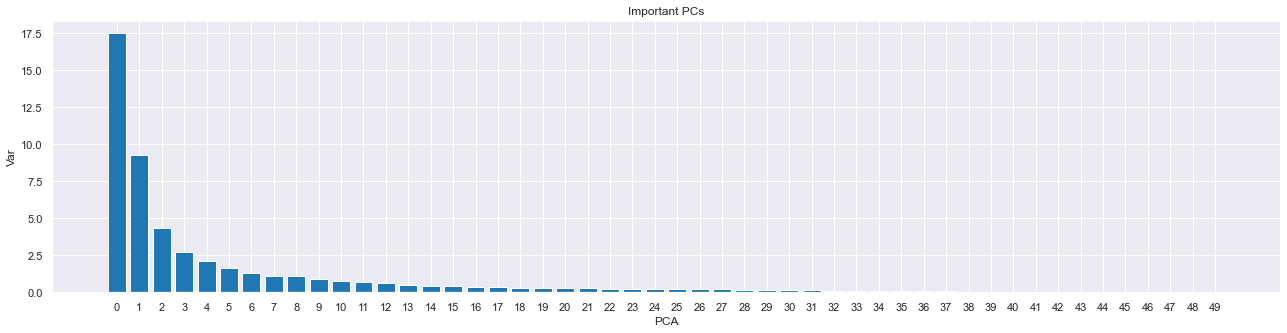

In [93]:
# Definition von Parametern für die PCA (zusaätzliche Dimensionsreduktion, um nur noch 3 Werte zu haben)
X = df[sensorNames]
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(X)

# Erstellen eines Barcharts, welcher die Variance der einzelnen features (sensoren) anzeigt
features = range(pca.n_components_)

# Größe des Barcharts definieren
_ = plt.figure(figsize=(22, 5))

# Eigentliches Barchart definieren
_ = plt.bar(features, pca.explained_variance_)

# Labels, Titles und Ticks des Barchart definierne 
_ = plt.xlabel('PCA')
_ = plt.ylabel('Var')
_ = plt.xticks(features)
_ = plt.title("Important PCs")

# Anzeigen des Barcharts
plt.show()

In [94]:
# Parameter definieren
pca = PCA(n_components=3)

# Skalieren und Transformieren des Datensatz mit dem Parameter "pca"
principalComponents = pca.fit_transform(X)

# df erstellen mit den drei ausgewählten Components der PCA
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC0', 'PC1','PC2'])

# pandas series aus den Spalten des DF "principalDF" erstellen
df['PC0']=pd.Series(principalDf['PC0'].values, index=df.index)
df['PC1']=pd.Series(principalDf['PC1'].values, index=df.index)
df['PC2']=pd.Series(principalDf['PC2'].values, index=df.index)

# for PC0
# 25- und 75-Quantil berechnen
q1_pc1, q3_pc1 = df['PC0'].quantile([0.25, 0.75])
# Interquartilsabstand berechnen
iqr_pc1 = q3_pc1 - q1_pc1
# Lower und Upper bestimmen, indem man den Interquartilsabstand mit +/- 1.5 multipliziert
lower_pc1 = q1_pc1 - (1.5*iqr_pc1)
upper_pc1 = q3_pc1 + (1.5*iqr_pc1)

# PC1
# 25- und 75-Quantil berechnen
q1_pc2, q3_pc2 = df['PC1'].quantile([0.25, 0.75])
# Interquartilsabstand berechnen
iqr_pc2 = q3_pc2 - q1_pc2
# Lower und Upper bestimmen, indem man den Interquartilsabstand mit +/- 1.5 multipliziert
lower_pc2 = q1_pc2 - (1.5*iqr_pc2)
upper_pc2 = q3_pc2 + (1.5*iqr_pc2)

# PC2
# 25- und 75-Quantil berechnen
q1_pc3, q3_pc3 = df['PC2'].quantile([0.25, 0.75])
# Interquartilsabstand berechnen
iqr_pc3 = q3_pc3 - q1_pc3
# Lower und Upper bestimmen, indem man den Interquartilsabstand mit +/- 1.5 multipliziert
lower_pc3 = q1_pc3 - (1.5*iqr_pc3)
upper_pc3 = q3_pc3 + (1.5*iqr_pc3)


# Spalten "anomaly_pc1/pc2/pc3" dem Dataframe "df" hinzufügn mit den Werten 0/1 je nachdem ob sie zwischen dem  
# definierten Wertebereich "upper_pc1/pc2/pc3, lower_pc1/pc2/pc3" liegen
df['anomaly_pc1'] = ((df['PC0']>upper_pc1) | (df['PC0']<lower_pc1)).astype('int')
df['anomaly_pc2'] = ((df['PC1']>upper_pc2) | (df['PC1']<lower_pc2)).astype('int')
df['anomaly_pc3'] = ((df['PC2']>upper_pc3) | (df['PC2']<lower_pc3)).astype('int')

# Ausreißer definieren (wie in Zeile 45-47)
outliers_pc1 = df.loc[(df['PC0']>upper_pc1) | (df['PC0']<lower_pc1), 'PC0']
outliers_pc2 = df.loc[(df['PC1']>upper_pc2) | (df['PC1']<lower_pc2), 'PC1']
outliers_pc3 = df.loc[(df['PC2']>upper_pc3) | (df['PC2']<lower_pc3), 'PC2']

In [95]:
# df definieren mit allen sensor Daten, alle anderen werden entfernt
X = df.drop(['machine_status', 'PC0','PC1' ,'PC2', 'anomaly_pc1', 'anomaly_pc2', 'anomaly_pc3'], axis=1)

# df definieren nur mit dem "machine_status"
y = df['machine_status']

# Scaler Parameter definieren und anwenden 
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Anwendung der "SelectKBest" class um die besten drei features zur extrahieren (Univariate Feature Selektion) 
bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(X_scaled, y)

# df erstellen mit den gefitteten Daten
dfscores = pd.DataFrame(fit.scores_)
# df erstellen mit den Spalten des DF "X" (= Alle Sensornamen)
dfcolumns = pd.DataFrame(X.columns)
# Gefittete Daten und Sensornamen zusammenfügen
featureScores = pd.concat([dfcolumns, dfscores], axis=1)

# Berechnen und printen des featureScores
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(3, 'Score'))

      Feature         Score
11  sensor_11  10122.905617
12  sensor_12   9892.421019
4   sensor_04   8183.104338


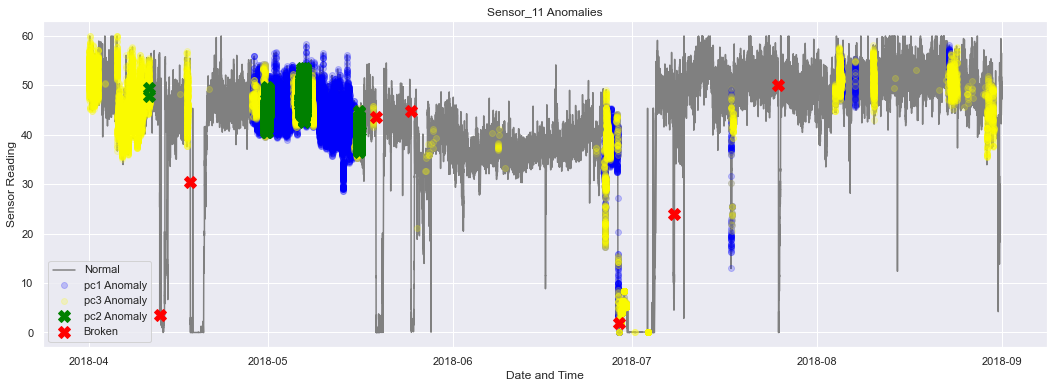

In [96]:
# Beispielhaftes Anomalie-Diagramm des Sensors "sensor_11" mit dem Zeitpunkt wann die Wasserpumpen kaputt gegangen sind 
a = df[df['anomaly_pc1'] == 1] 
b = df[df['anomaly_pc2'] == 1]
c = df[df['anomaly_pc3'] == 1]
# Diagrammgröße definieren
_ = plt.figure(figsize=(18,6))
# Inhalts des Diagramms definieren
_ = plt.plot(df['sensor_11'], color='grey', label='Normal')
_ = plt.plot(a['sensor_11'], linestyle='none', marker='.', color='blue', markersize=12, label='pc1 Anomaly', alpha = 0.2)
_ = plt.plot(c['sensor_11'], linestyle='none', marker='.', color='yellow', markersize=12, label='pc3 Anomaly', alpha=0.2)
_ = plt.plot(b['sensor_11'], linestyle='none', marker='X', color='green', markersize=12, label='pc2 Anomaly')
_ = plt.plot(dfBroken['sensor_11'], linestyle='none', marker='X', color='red', markersize=12, label='Broken')
# Zusatzinformationen wie label, titel und legen definieren
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_11 Anomalies')
_ = plt.legend(loc='best')
# Diagramm anzeigen lassen
plt.show()

In [97]:
# kmeans definieren mit 3 Clustern und dem Random_state 42
kmeans = KMeans(n_clusters=3, random_state=42)
# Ausführen der .fit Funktion mit dem Parameter kmeans und dem Dataframe "principalDf"
kmeans.fit(principalDf.values)
# labels mit der Funktion .predict definieren mit dem Paramter kmeans und dem Dataframe "principalDf"
labels = kmeans.predict(principalDf.values)
# Unique_elements und counts_elements definieren anhand der Funktion np.unique der "labels"
unique_elements, counts_elements = np.unique(labels, return_counts=True)
# Cluster als np.array von "unique_elements" und "counts_elements" definieren 
clusters = np.asarray((unique_elements, counts_elements))

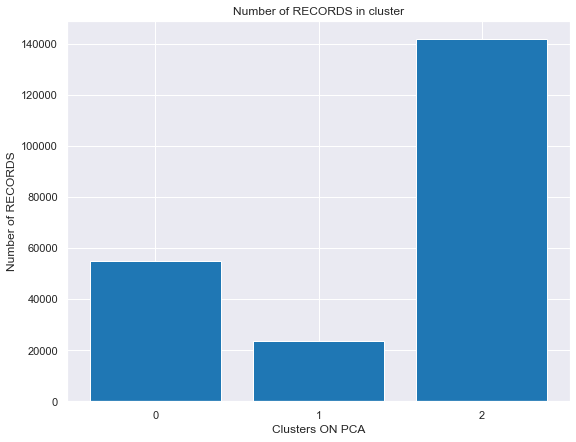

In [98]:
# Diagrammgröße definieren
_ = plt.figure(figsize = (9, 7))
# Barplot initialisieren mit den Cluster 0 und 1 und tick labels cluster 0 
_ = plt.bar(clusters[0], clusters[1], tick_label=clusters[0])
# Beschreibung des Barplots definieren
_ = plt.xlabel('Clusters ON PCA')
_ = plt.ylabel('Number of RECORDS')
_ = plt.title('Number of RECORDS in cluster')
# Anzeigen des Barplots
plt.show()

In [99]:
# Funktion um die Distance zwischen den Punkten zu erkennen
def getDistanceByPoint(data, model):
    # Leere Liste initialisieren
    distance = []
    
    # For-Schleife in der länge des Parameters "data"
    for i in range(0,len(data)):
        
        # Definition eines numpy arrays mit den daten.loc[i] der for-Schleife
        Xa = np.array(data.loc[i])
        # Definition der Cluster Center der labels[i] der for Schleife
        Xb = model.cluster_centers_[model.labels_[i]]
        # distance liste erweitern mit der euclidischen Entferneung zwischen "Xa" und "Xb"
        distance.append(np.linalg.norm(Xa-Xb))
    
    # Zurückgabe einer pandas series der "distance" Liste
    return pd.Series(distance, index=data.index)

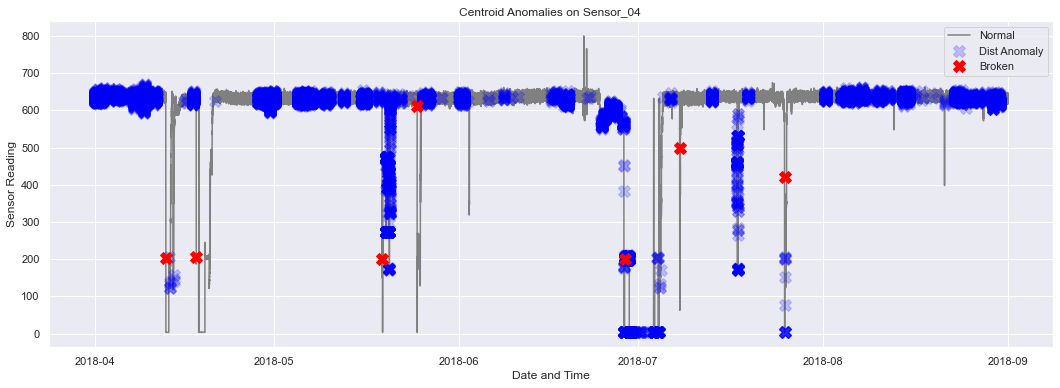

In [100]:
# Ausführen der Funktion "getDistanceByPoint" mit dem DF "principarDf und dem model "kmeans"
distance = getDistanceByPoint(principalDf, kmeans)

# Definition von Parametern für den treshhold
outliers_fraction = 0.11
number_of_outliers = int(outliers_fraction*len(distance))

# Berechnung des Treshholds
threshold = distance.nlargest(number_of_outliers).min()

# Erweitern des DF "principalDF" wenn der Weert aus "distance" größergleich dem "trehshold" ist
principalDf['anomalyDist'] = (distance >= threshold).astype(int)

# Umwandlung der Spalte "anoalyDist" des DF "principalDF" in eine pandas series und hinzufügen zu dem Haupt-DF "df"
df['anomalyDist'] = pd.Series(principalDf['anomalyDist'].values, index=df.index)

# Beispielhafte Veranschaulichung der Centroid Anomalien des "sensors_04"  
a = df[df['anomalyDist'] == 1]
# Diagrammgröße definieren
_ = plt.figure(figsize=(18,6))
# Diagramminhalt definieren
_ = plt.plot(df['sensor_04'], color='grey', label='Normal')
_ = plt.plot(a['sensor_04'], linestyle='none', marker='X', color='blue', markersize=12, label='Dist Anomaly', alpha= 0.2)
_ = plt.plot(dfBroken['sensor_04'], linestyle='none', marker='X', color='red', markersize=12, label='Broken')
_ = plt.xlabel('Date and Time')
# Diagramm Label, Titel und Legend ergänzen
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Centroid Anomalies on Sensor_04 ')
_ = plt.legend(loc='best')
# Diagramm darstellen
plt.show()

In [101]:
# Zählen der Werte der drei Kategorien (0,1,2)
df[df['anomalyDist']==1]['machine_status'].value_counts()

0    22306
2     1928
1        1
Name: machine_status, dtype: int64

In [102]:
# Alle verschiedenen Werte der Spalte "machine_status" zählen 
df['machine_status'].value_counts()

0    205836
2     14477
1         7
Name: machine_status, dtype: int64

<b>Beobachtung</b>:
<br>Nur einer der sieben "BROKEN (1)" "machine_status" konnte erkannt werden

### IsolationForest

In [104]:
# Importieren des IsolationForests
from sklearn.ensemble import IsolationForest

In [105]:
# Definiton Parameter
outliers_fraction = 0.11 

# Initialisierung und Fitten des Modells an dem DF "principalDF"
model =  IsolationForest(contamination=outliers_fraction)
model.fit(principalDf.values) 

# Erstellen einer pandas series aus dem predicteten Werten
# Pandas Series der Spalte "anomaly_forest" dem DF "principalDF" hinzufügen
principalDf['anomalyForest'] = pd.Series(model.predict(principalDf.values))

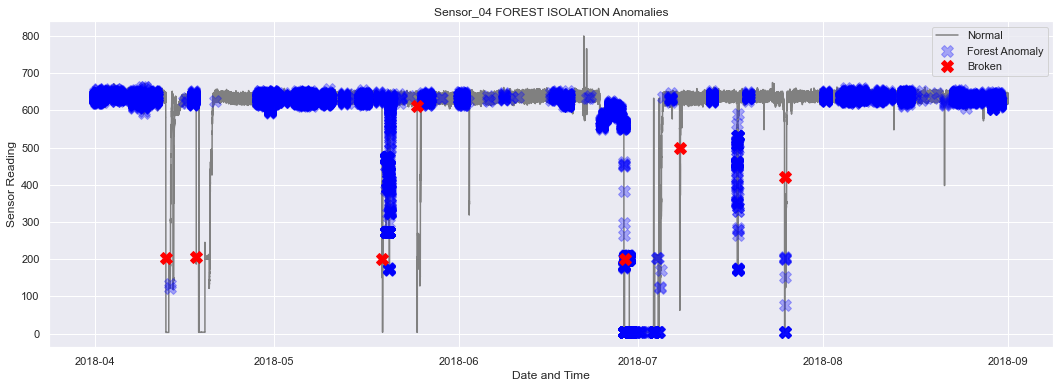

In [106]:
# Beispielhafte Veranschaulichung des IsolationFOrest des Sensors "sensors_04" 
df['anomalyForest'] = pd.Series(principalDf['anomalyForest'].values, index=df.index)
a = df.loc[df['anomalyForest'] == -1] 
# Diagrammgröße definieren
_ = plt.figure(figsize=(18,6))
# Diagramminhalt definieren
_ = plt.plot(df['sensor_04'], color='grey', label='Normal')
_ = plt.plot(a['sensor_04'], linestyle='none', marker='X', color='blue', markersize=12, label='Forest Anomaly', alpha=0.3)
_ = plt.plot(dfBroken['sensor_04'], linestyle='none', marker='X', color='red', markersize=12, label='Broken')
# Diagramm Label, Titel und Legend definieren
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_04 FOREST ISOLATION Anomalies')
_ = plt.legend(loc='best')
# Diagramm zeigen
plt.show()

In [107]:
# Zählen wie viele Werte "1" bzw "-1" sind 
df['anomalyForest'].value_counts()

 1    196084
-1     24236
Name: anomalyForest, dtype: int64

In [108]:
# Anzeigen aller richtig predicteden Werte
df[df['anomalyForest']==1]['machine_status'].value_counts()

0    183488
2     12590
1         6
Name: machine_status, dtype: int64

In [109]:
df['machine_status'].value_counts()

0    205836
2     14477
1         7
Name: machine_status, dtype: int64

<b>Beobachtung</b>:
<br>Der IsolationForest konnte 6 der 7 als "Broken" kategorisierten "machinen_Status" richtig erkennen!

In [111]:
# Finale Form des Dataframes "df"
df.head()

sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
timestamp                                                                    
2018-04-01 00:00:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:01:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:02:00   2.444734   47.35243    53.2118  46.397570   638.8889   
2018-04-01 00:03:00   2.460474   47.09201    53.1684  46.397568   628.1250   
2018-04-01 00:04:00   2.445718   47.13541    53.2118  46.397568   636.4583   

                     sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
timestamp                                                                    
2018-04-01 00:00:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:01:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:02:00   73.54598   13.32465   16.03733   15.61777   15.01013   
2018-04-01 00:03:00   76.98898   13.31742   16.24711   15.69734   15.08247   
2018-04-01 00:04:00   76.58897   13.35359   16.21094   15.69734   15.08247   

                     ...  sensor_51  machine_status        PC0         PC1  \
timestamp            ...                                                     
2018-04-01 00:00:00  ...   201.3889               0  69.571856  265.638925   
2018-04-01 00:01:00  ...   201.3889               0  69.571856  265.638925   
2018-04-01 00:02:00  ...   203.7037               0  27.899347  283.406422   
2018-04-01 00:03:00  ...   203.1250               0  24.610355  290.163042   
2018-04-01 00:04:00  ...   201.3889               0  29.680845  294.560542   

                            PC2  anomaly_pc1  anomaly_pc2  anomaly_pc3  \
timestamp                                                                
2018-04-01 00:00:00 -420.415668            0            0            1   
2018-04-01 00:01:00 -420.415668            0            0            1   
2018-04-01 00:02:00 -386.463000            0            0            1   
2018-04-01 00:03:00 -354.993329            0            0            1   
2018-04-01 00:04:00 -379.712725            0            0            1   

                     anomalyDist  anomalyForest  
timestamp                                        
2018-04-01 00:00:00            1             -1  
2018-04-01 00:01:00            1             -1  
2018-04-01 00:02:00            1             -1  
2018-04-01 00:03:00            1              1  
2018-04-01 00:04:00            1              1  

[5 rows x 59 columns]

<a href='#3'> Zurück zum Anfang des Kapitels</a>

<a href='#Inhaltsverzeichnis'> Zurück zum Inhaltsverzeichnis</a>

<a class="anchor" id="4"></a>
# 4. Fazit

<ul>
    <li>Der Datensatz ist stark unausgewogen, d.h. die Klasse 'broken' ist mit 7 Datenpunkten stark unterrepräsentiert. Die meisten Klassifikationsalgorithmen ignorieren daher diese Klasse - und machen aus einem Multi-Class-Problem ein binäres Klassifikationsproblem.</li>
    <li>Die Ausreißeranalyse mittels z-Score hat gezeigt, dass rund 55.000 Datenpunkte als Ausreißer eingestuft werden können. Diese wurden nicht entfernt, da die Klasse 'recovering' sonst vollständig entfernt werden wäre. Möglicherweise leidet darunter die Modellperformance.</li>
    <li>Da der 'machine_status' über mehr als 2 Klassen verfügt, kann keine normale ROC-Kurve erstellt werden. Die Visualisierung ist daher schwierig.</li>
    <li>Der Deep-Learning Ansatz berücksichtigt im Gegensatz zu den anderen Klassifikationsansätzen die Klasse 'broken'.</li>
    <li>Die Clusteranalyse hat gezeigt, dass die Datenpunkte der Klassen 'normal' und 'broken' eng beieinanderliegen. Dies erklärt, warum die Klassifikationsalgorithmen nicht in der Lage sind, die beiden Klassen zu unterscheiden. </li>
    <li>Mittels Anomalieerkennung ist es möglich, die 7 Datenpunkte der Klasse 'broken' nachträglich zu identifizieren.</li>
</ul>

<a href='#4'> Zurück zum Anfang des Kapitels</a>

<a href='#Inhaltsverzeichnis'> Zurück zum Inhaltsverzeichnis</a>

<a class="anchor" id="5"></a>
# 5. Limitationen

<ul>
    <li>Es wurden keine weiteren ML-Algorithmen zur Regression inklusive Hyperparametertuning durchgeführt und getestet, ob diese eine bessere Performance, insb. für die Klasse 'broken' liefern.</li>
    <li>Es wurde kein Oversampling der Klasse 'broken' bzw. ein Undersampling der beiden anderen Klassen durchgeführt, um zu überprüfen, ob dies zu einer besseren Performance führt.</li>
    <li>Das Ergebnis des Clusterings konnte nicht grafisch visualisiert werden, da die Daten nach der PCA 6-dimensional sind. Eine Visualisierung mit einer weiteren Dimensionsreduktion nach dem Clustering wäre denkbar.</li>
    <li>Die Datenpunkte wurden als individuell angesehen. Die Berücksichtigung des Zeitbezugs der einzelnen Datenpunkte , beispielsweise mittels eines LSTM, könnte möglicherweise zu einer Verbesserung des Ergebnisses führen.</li>
</ul>

<a href='#5'> Zurück zum Anfang des Kapitels</a>

<a href='#Inhaltsverzeichnis'> Zurück zum Inhaltsverzeichnis</a>